In [1]:
install.packages("pROC")
install.packages("vctrs")
install.packages("caret")
install.packages("nnet")
install.packages("ggplot2")
install.packages("cowplot")


The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpN8AJBo/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpN8AJBo/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpN8AJBo/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpN8AJBo/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpN8AJBo/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpN8AJBo/downloaded_packages


### import data and visualise the target variable

[1] "MOS_test"               "basic_model"            "correlation_matrix"    
 [4] "fit"                    "list"                   "mse"                   
 [7] "plot_vars_against_targ" "predictions"            "squared_errors"        
[10] "stage1"                 "stage2"                 "subset"                
[13] "target"                 "transform"

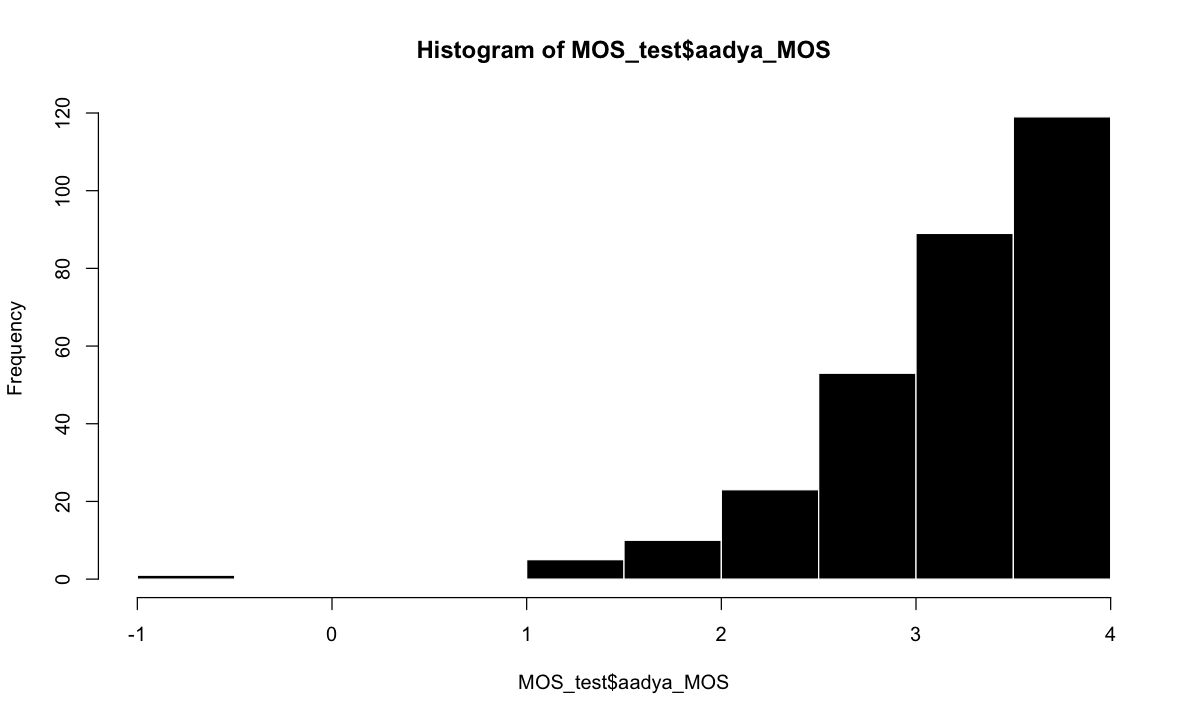

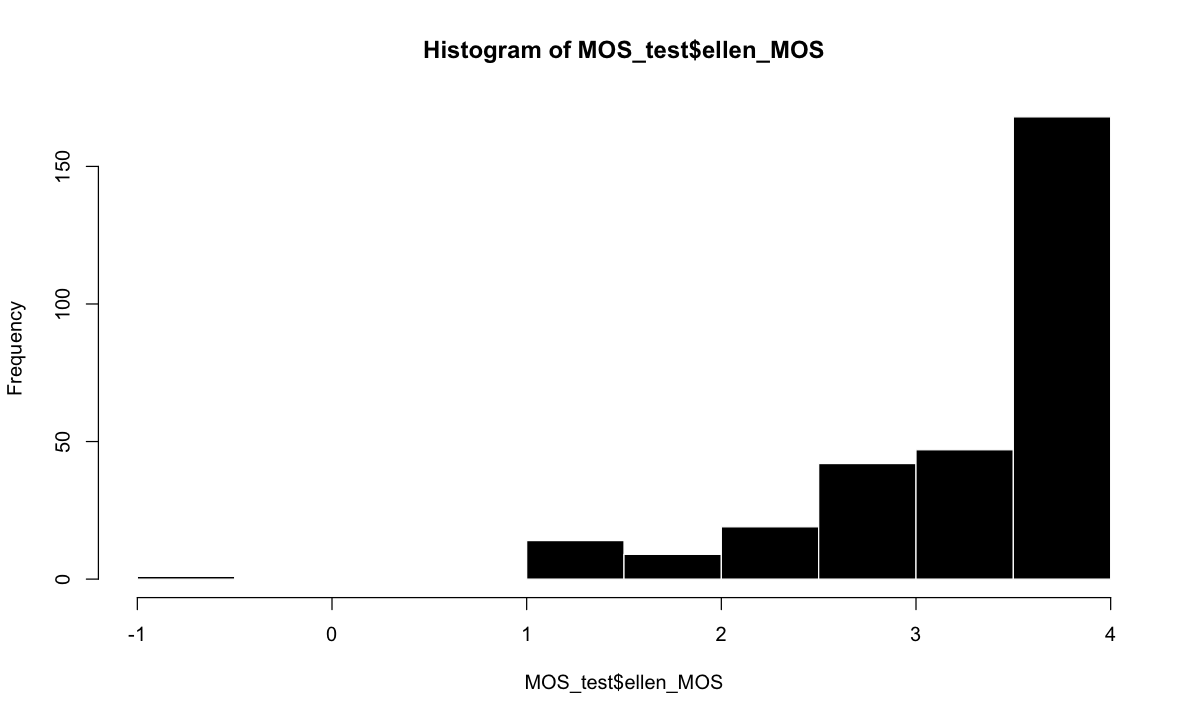

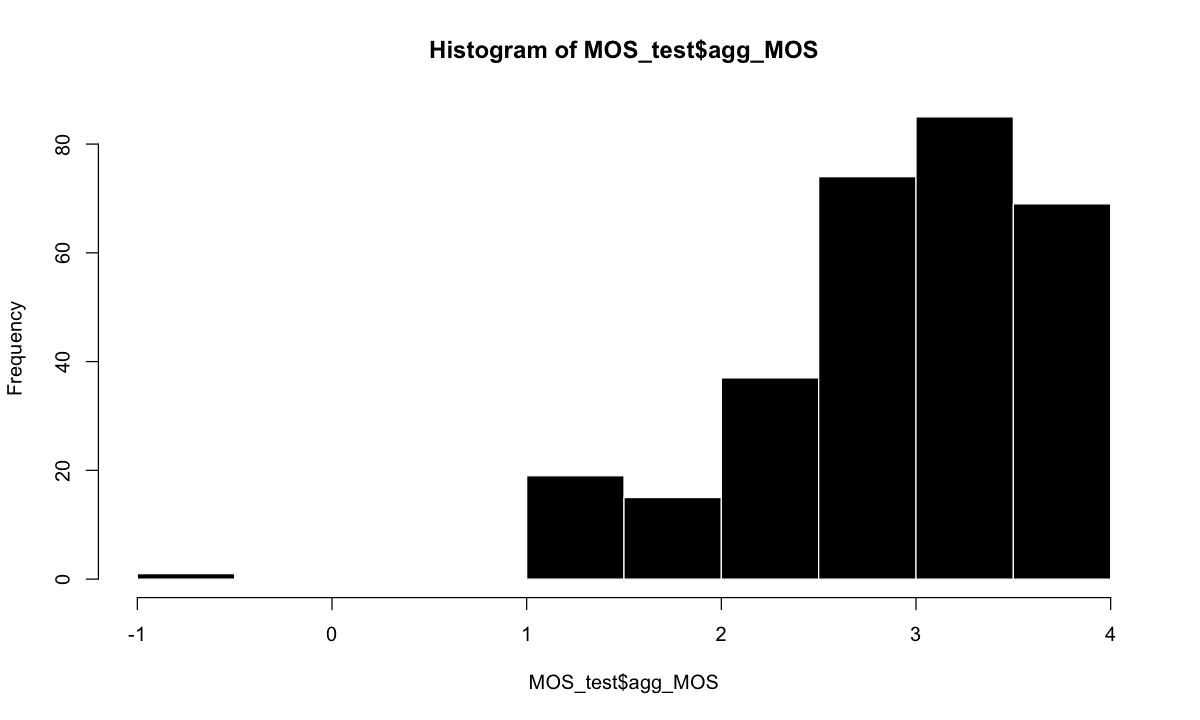

In [117]:
(list=ls()) #clears the workspace
#import dataset
#REPLACE WITH THE FILEPATH OF THE OUTPUT FROM MOS
MOS_test = read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/STAGE1_final_regression_table.csv") 
target = MOS_test$agg_MOS #make sure column header matches
par(bg = "white")  # set background color to white

#plot the target variable
par(bg = "white")
hist(MOS_test$aadya_MOS, 
     col = "black",
     border = "white")

par(bg = "white")
hist(MOS_test$ellen_MOS, 
     col = "black",
     border = "white")

par(bg = "white")
hist(MOS_test$agg_MOS, 
     col = "black",
     border = "white")

Scatter plots against predictors

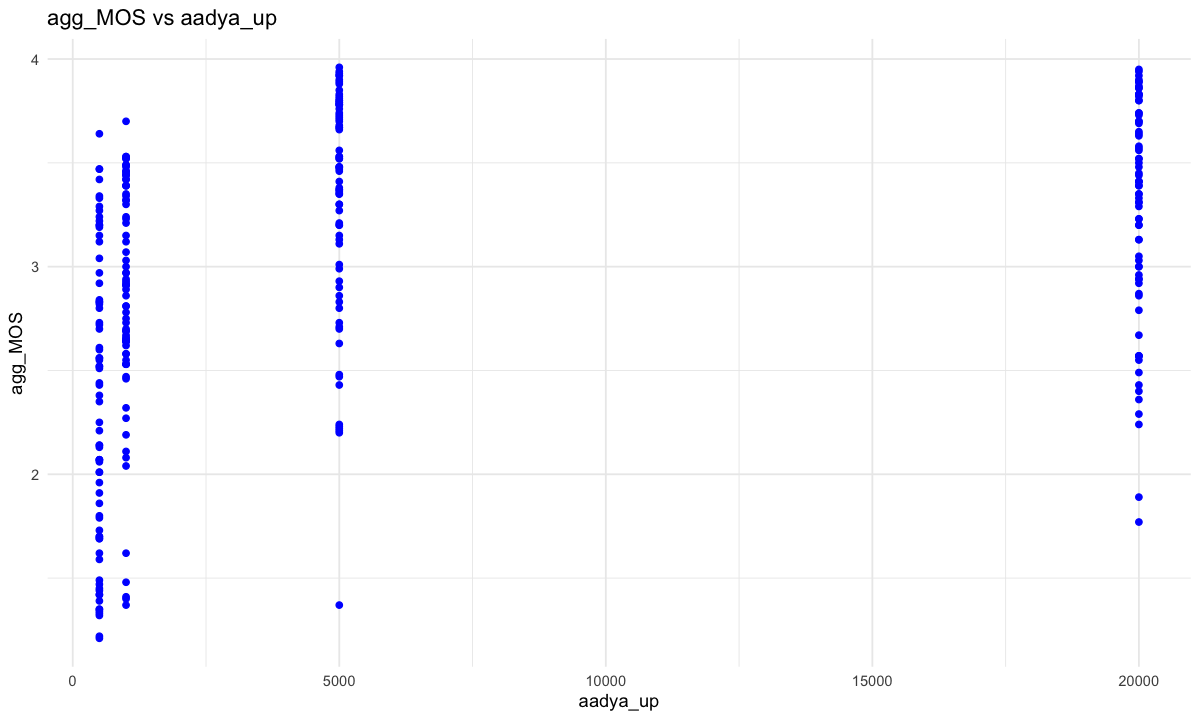

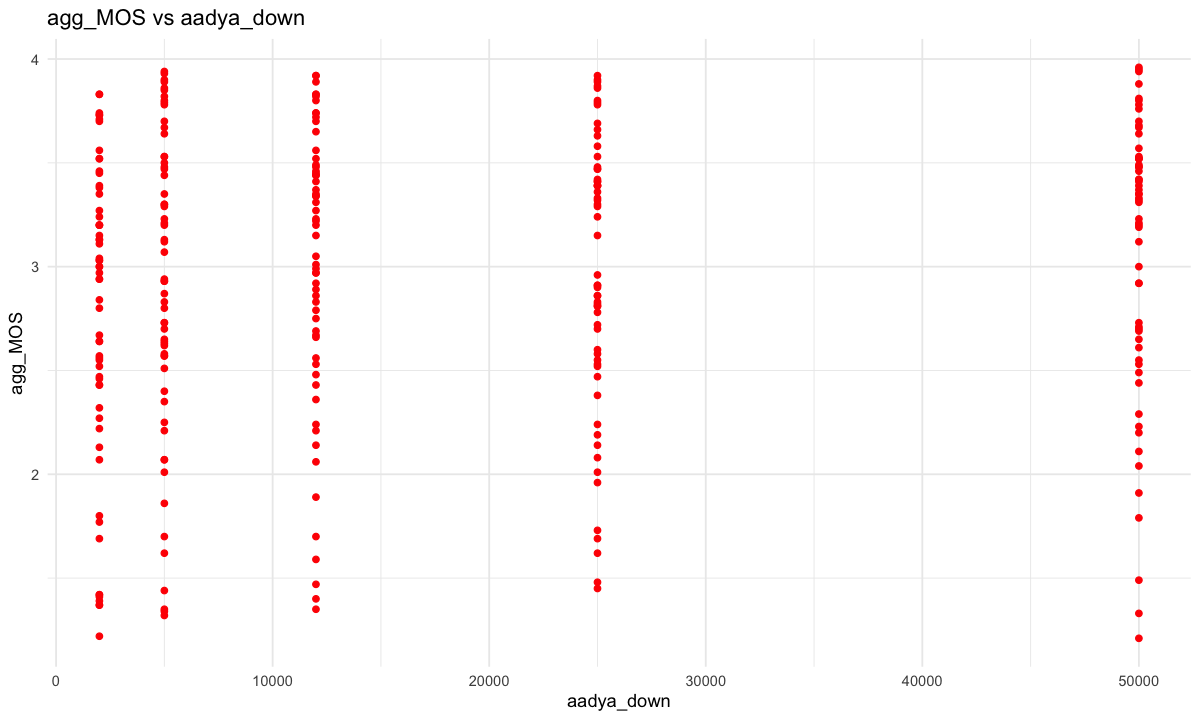

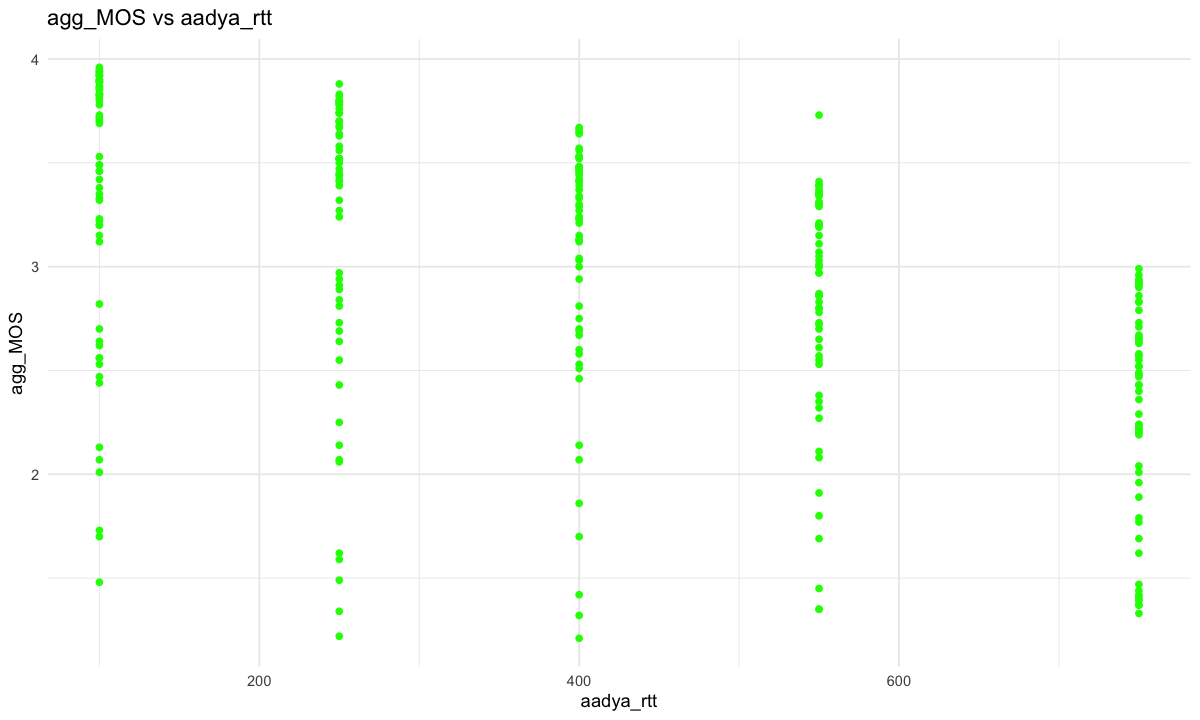

In [3]:
library(ggplot2)
library(cowplot)
library(IRdisplay)
options(repr.plot.width = 10, repr.plot.height = 6)

# Scatter plot for agg_MOS vs aadya_up
ggplot(MOS_test, aes(x = aadya_up, y = agg_MOS)) +
  geom_point(color = "blue") +
  labs(title = "agg_MOS vs aadya_up", x = "aadya_up", y = "agg_MOS") +
  theme_minimal()

# Scatter plot for agg_MOS vs aadya_down
ggplot(MOS_test, aes(x = aadya_down, y = agg_MOS)) +
  geom_point(color = "red") +
  labs(title = "agg_MOS vs aadya_down", x = "aadya_down", y = "agg_MOS") +
  theme_minimal()

# Scatter plot for agg_MOS vs aadya_rtt
ggplot(MOS_test, aes(x = aadya_rtt, y = agg_MOS)) +
  geom_point(color = "green") +
  labs(title = "agg_MOS vs aadya_rtt", x = "aadya_rtt", y = "agg_MOS") +
  theme_minimal()

# Simple linear regression 

## fits a linear regression to the data
stores it in the var fit <br>
dependent var: AGG_MOS <br>
predictor vars: up, down, rtt <br>

In [48]:
MOS_test = read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/STAGE1_final_regression_table copy.csv") 
fit <- lm((agg_MOS) ~ log(aadya_up) + aadya_down + aadya_rtt, MOS_test)
summary(fit)


Call:
lm(formula = (agg_MOS) ~ log(aadya_up) + aadya_down + aadya_rtt, 
    data = MOS_test)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.71146 -0.30119  0.05116  0.38391  1.05081 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.516e+00  1.752e-01   8.654 3.29e-16 ***
log(aadya_up)  2.476e-01  2.047e-02  12.092  < 2e-16 ***
aadya_down     4.583e-06  1.681e-06   2.727  0.00677 ** 
aadya_rtt     -1.491e-03  1.291e-04 -11.550  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5066 on 295 degrees of freedom
Multiple R-squared:  0.4917,	Adjusted R-squared:  0.4865 
F-statistic: 95.11 on 3 and 295 DF,  p-value: < 2.2e-16


## Perform prediction
performs prediction based on the fit from above <br>
and plots it against the actual MOS scores <br>

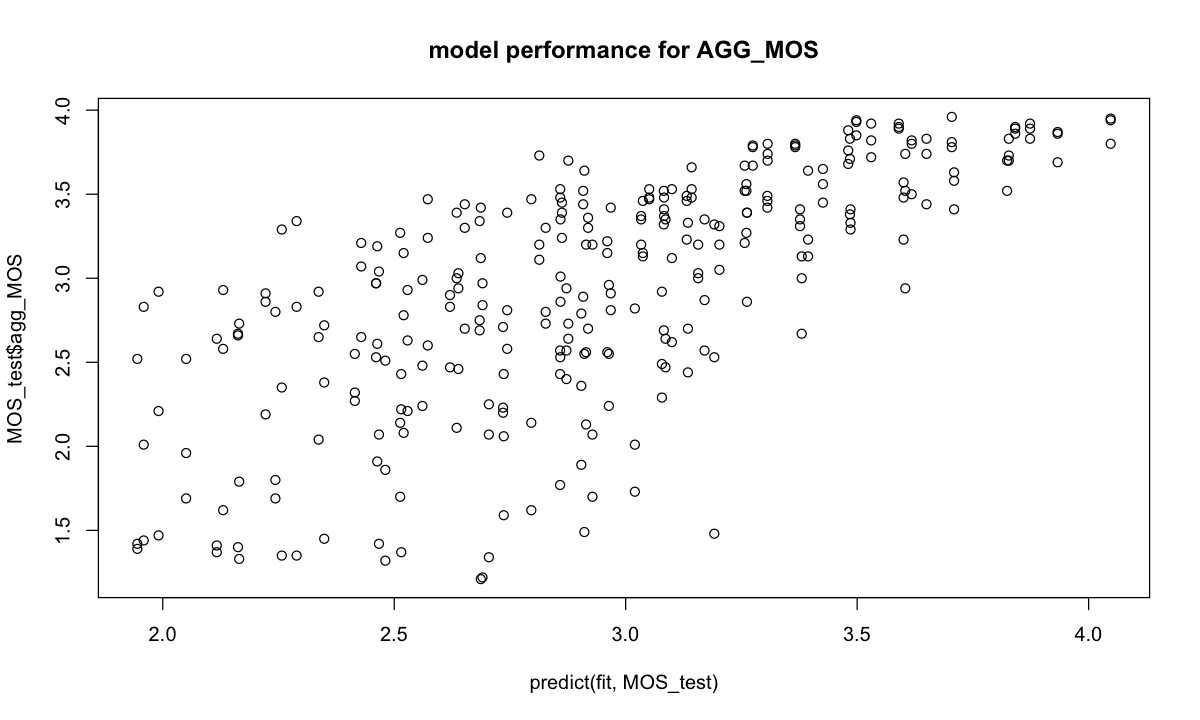

In [8]:
par(bg = "white")  # set background color to white
options(repr.plot.width = 10, repr.plot.height = 6)
predictions <- predict(fit, MOS_test)
plot(predict(fit, MOS_test), MOS_test$agg_MOS, main="model performance for AGG_MOS")
#plots the predicted values against the real values for each datapoint
#a perfect regression would have a y=x diagonal line

plots residuals- there should be no trend. If there is a trend then it means something non-linear is happening

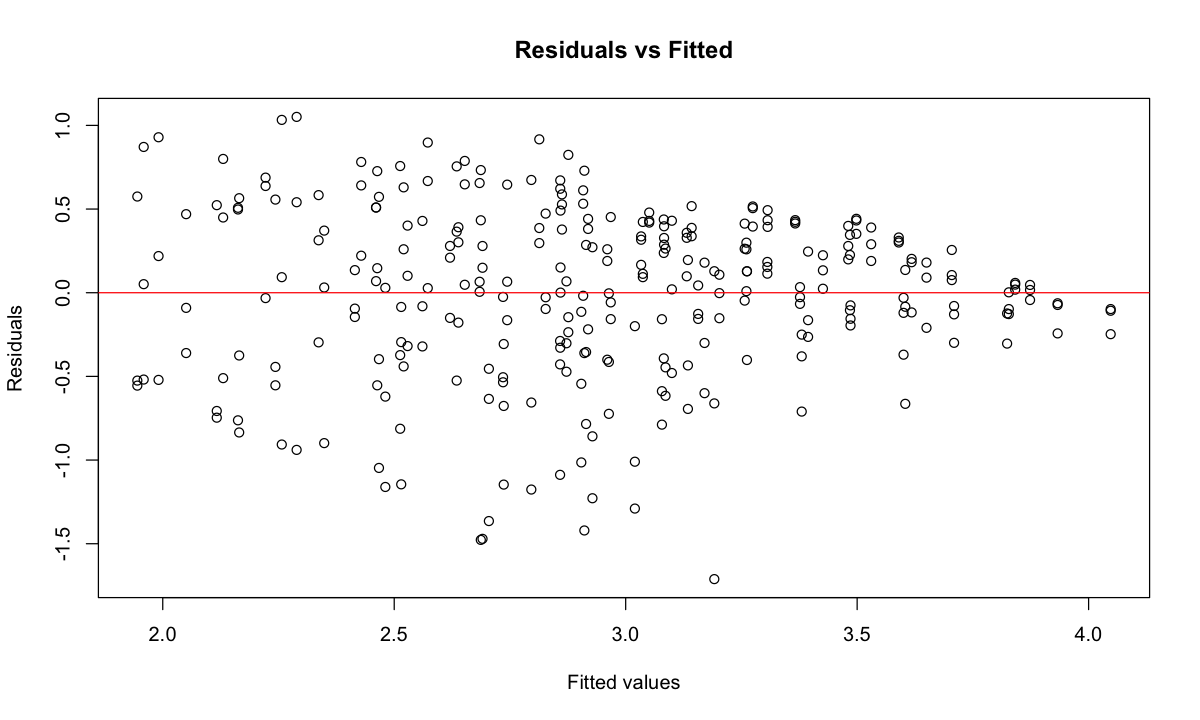

In [49]:
par(bg = "white")  # set background color to white
options(repr.plot.width = 10, repr.plot.height = 6)
plot(fit$fitted.values, resid(fit), 
     main = "Residuals vs Fitted", 
     xlab = "Fitted values", 
     ylab = "Residuals")
abline(h = 0, col = "red")

Mean squared error

In [10]:
# Calculate the squared errors
squared_errors <- (predictions - target)^2
# Calculate MSE
mse <- mean(squared_errors)
# Print MSE
cat("Mean Squared Error (MSE):", mse, "\n")

Mean Squared Error (MSE): 0.2531921 


In [36]:
subset <- MOS_test[, c("aadya_up", "aadya_down", "aadya_rtt")]
correlation_matrix <- cor(subset)
print(correlation_matrix)

           aadya_up aadya_down aadya_rtt
aadya_up          1          0         0
aadya_down        0          1         0
aadya_rtt         0          0         1


# box-cox transformation?

In [51]:
install.packages("car")
library(car)

Warning message:
"dependency 'Matrix' is not available"
also installing the dependencies 'Deriv', 'modelr', 'microbenchmark', 'broom', 'doBy', 'SparseM', 'MatrixModels', 'minqa', 'nloptr', 'RcppEigen', 'carData', 'abind', 'pbkrtest', 'quantreg', 'lme4'





The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpN8AJBo/downloaded_packages


Loading required package: carData



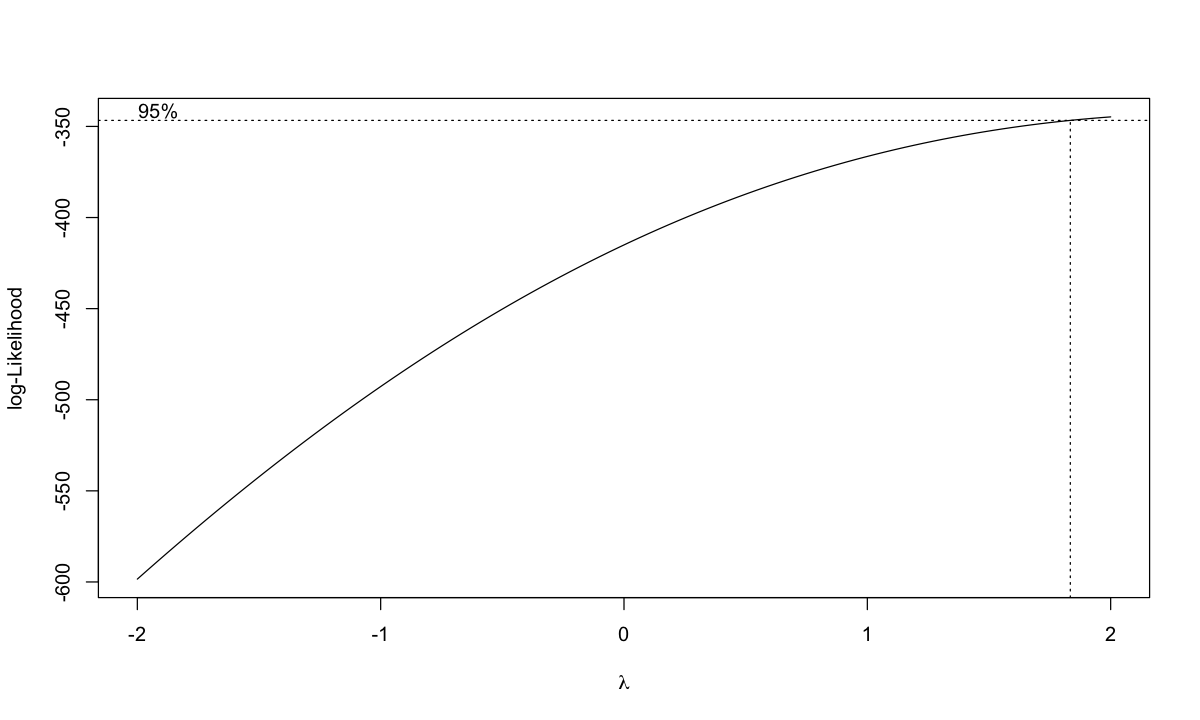

In [54]:
MOS_test = read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/STAGE1_final_regression_table copy.csv") 
basic_model <- lm(agg_MOS ~ aadya_up + aadya_down + aadya_rtt, MOS_test)
par(bg = "white")  # set background color to white
boxcox(basic_model)

In [55]:
transform <- lm(agg_MOS^2 ~ aadya_up + aadya_down + aadya_rtt, MOS_test)
summary(transform)


Call:
lm(formula = agg_MOS^2 ~ aadya_up + aadya_down + aadya_rtt, data = MOS_test)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8350 -1.7550  0.4058  2.4432  6.7093 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.109e+01  4.248e-01  26.114  < 2e-16 ***
aadya_up     1.812e-04  2.178e-05   8.321 3.27e-15 ***
aadya_down   2.529e-05  9.860e-06   2.565   0.0108 *  
aadya_rtt   -8.811e-03  7.575e-04 -11.633  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.972 on 295 degrees of freedom
Multiple R-squared:  0.4155,	Adjusted R-squared:  0.4095 
F-statistic:  69.9 on 3 and 295 DF,  p-value: < 2.2e-16


# General function to fit and plot

### for a completely linear relationship of the three vars - we could generalise so it can handle logs and stuff too

In [19]:
plot_vars_against_targ <- function(target, target_name) {
  library(ggplot2)
  #import data
  MOS_test <- read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/STAGE1_final_regression_table copy.csv") 
  #perform fit
  fit <- lm(target ~ aadya_up + aadya_down + aadya_rtt, MOS_test)
  #print summary of variables and significance
  print(summary(fit))

  #set up plotting environment
  options(repr.plot.width = 10, repr.plot.height = 6) #fix size
  par(bg = "white")  # set background color to white

  # Scatter plot for aadya_up
  p1 <- ggplot(MOS_test, aes(x = aadya_up, y = target)) +
    geom_point(color = "blue") +
    labs(title = paste(target_name, "vs aadya_up"), x = "aadya_up", y = target_name) +
    theme_minimal()
  print(p1)
  p2 <- ggplot(MOS_test, aes(x = aadya_down, y = target)) +
    geom_point(color = "purple") +
    labs(title = paste(target_name, "vs aadya_down"), x = "aadya_down", y = target_name) +
    theme_minimal()
  print(p2)
  p3 <- ggplot(MOS_test, aes(x = aadya_rtt, y = target)) +
    geom_point(color = "orange") +
    labs(title = paste(target_name, "vs aadya_rtt"), x = "aadya_rtt", y = target_name) +
    theme_minimal()
  print(p3)



  #plots the predicted values against the real values for each datapoint
  predictions <- predict(fit, MOS_test)
  plot(predict(fit, MOS_test), target, main= paste("model performance for", target_name))
}

# Execution cells for fitting and plotting

In [56]:
plot_vars_against_targ(MOS_test$agg_video_MOS, "aggregate video MOS")
log_fit <- lm(agg_video_MOS ~ log( aadya_up) + aadya_down + aadya_rtt, MOS_test)
summary(log_fit)

ERROR: Error in model.frame.default(formula = target ~ aadya_up + aadya_down + : variable lengths differ (found for 'aadya_up')



Call:
lm(formula = target ~ aadya_up + aadya_down + aadya_rtt, data = MOS_test)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.66611 -0.26971  0.09275  0.39543  1.51899 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.826e+00  7.399e-02  51.706  < 2e-16 ***
aadya_up     1.884e-05  3.793e-06   4.966 1.16e-06 ***
aadya_down   3.025e-06  1.717e-06   1.761   0.0792 .  
aadya_rtt   -2.540e-03  1.319e-04 -19.251  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5176 on 295 degrees of freedom
Multiple R-squared:  0.5738,	Adjusted R-squared:  0.5694 
F-statistic: 132.4 on 3 and 295 DF,  p-value: < 2.2e-16



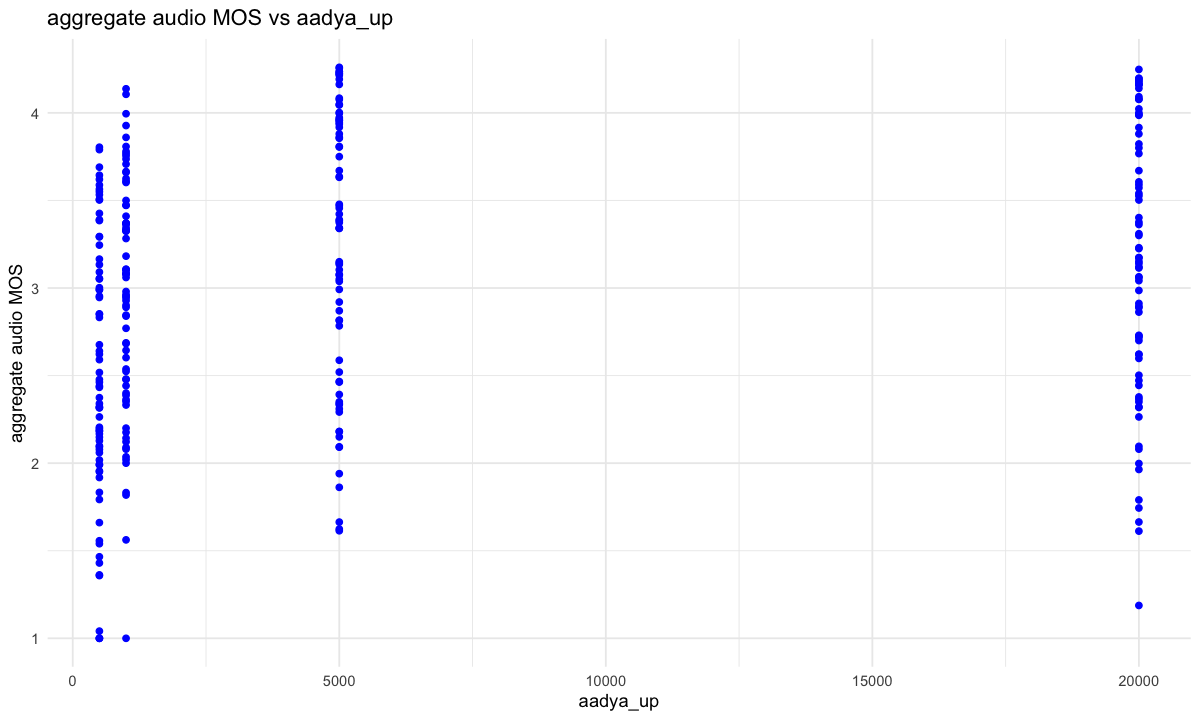

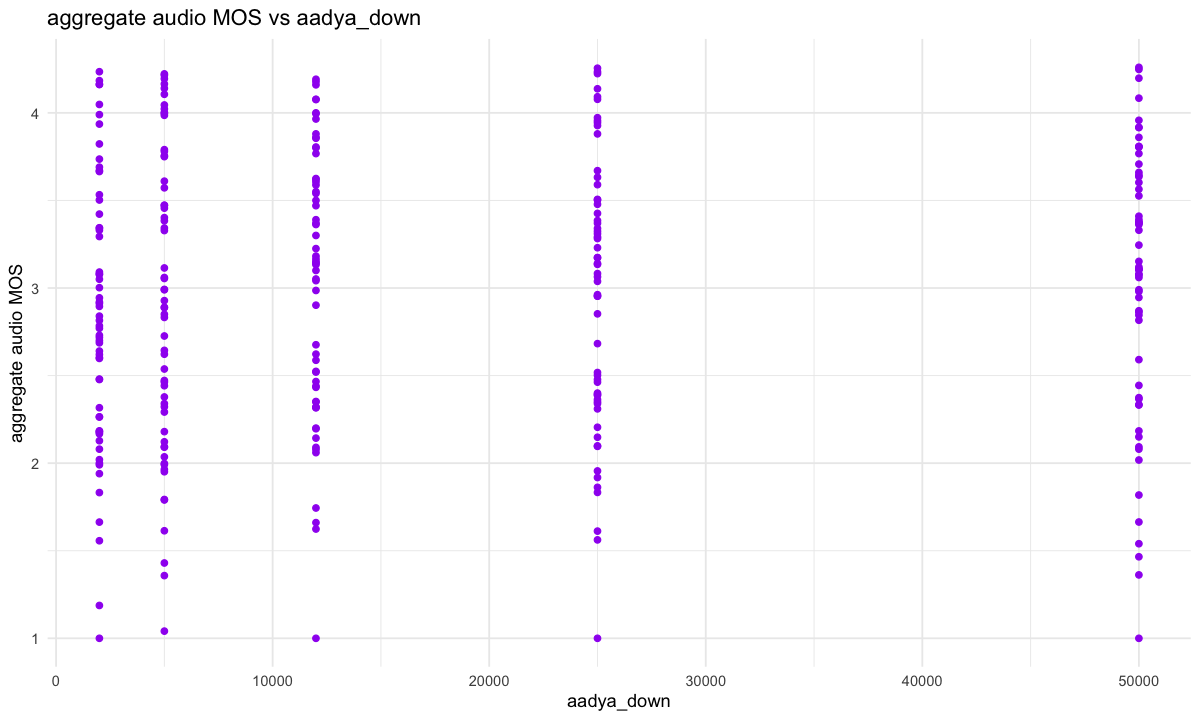

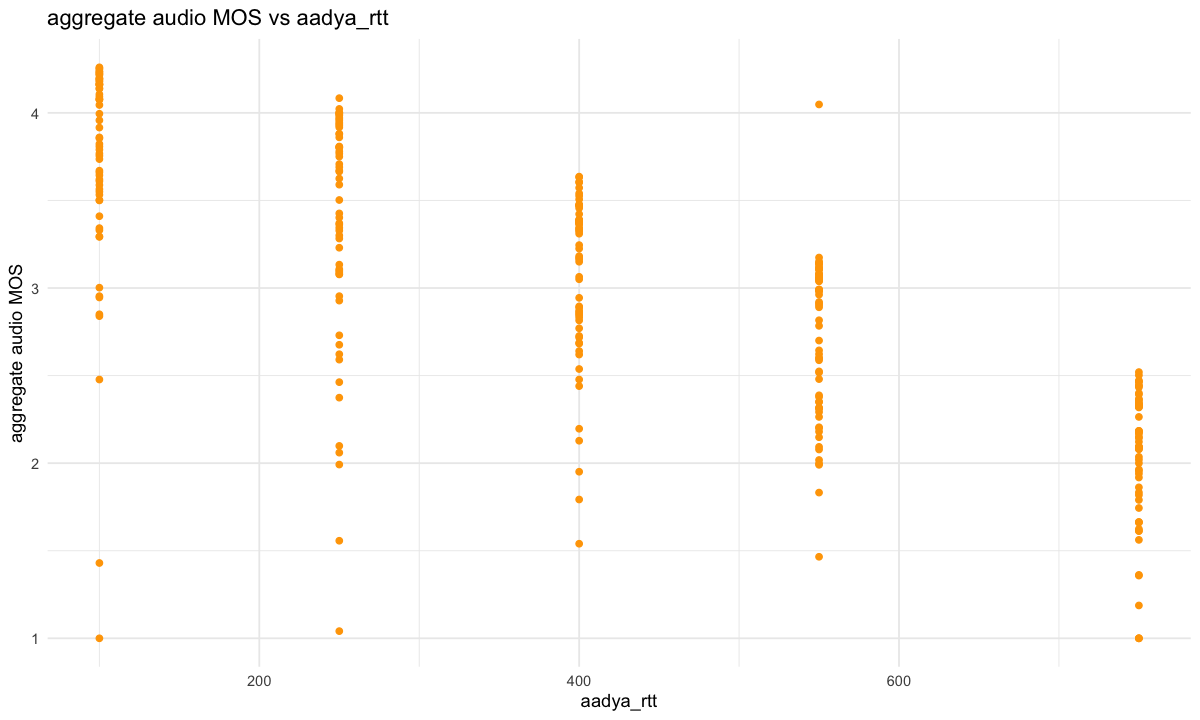

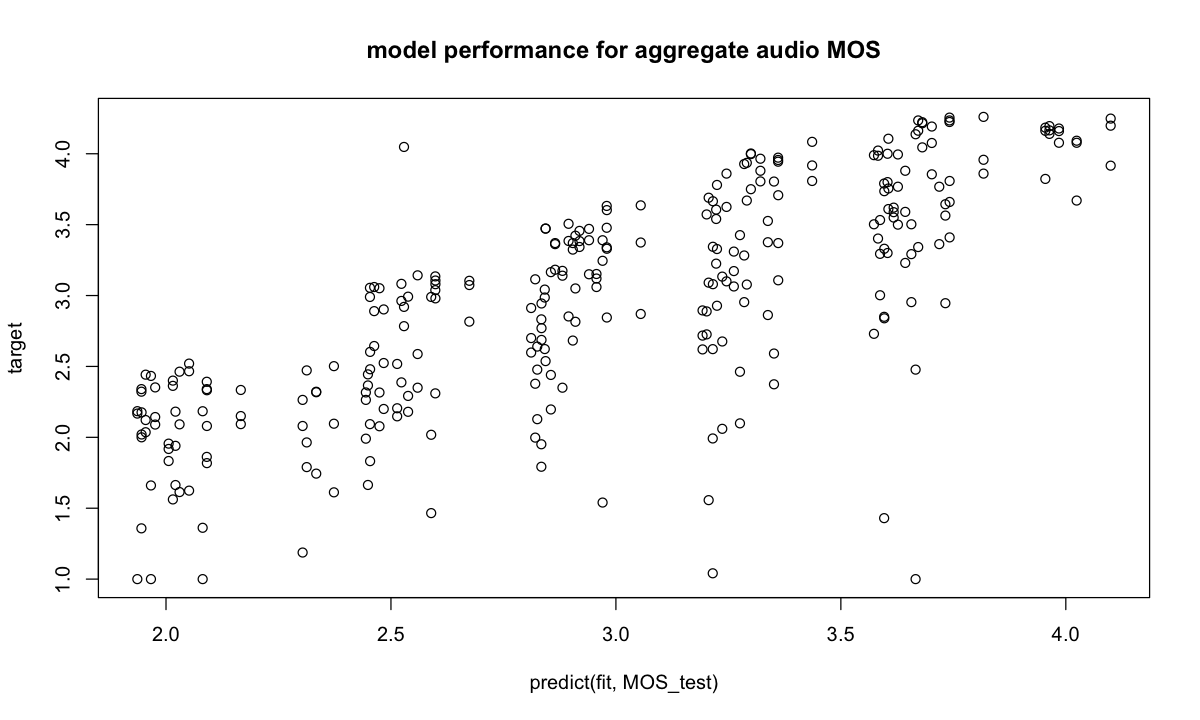

In [21]:
plot_vars_against_targ(MOS_test$agg_audio_MOS, "aggregate audio MOS")


Call:
lm(formula = target ~ aadya_up + aadya_down + aadya_rtt, data = MOS_test)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.76799 -0.13384  0.05659  0.23920  1.14377 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.014e+00  5.096e-02  78.760  < 2e-16 ***
aadya_up     5.829e-06  2.613e-06   2.231  0.02644 *  
aadya_down   3.655e-06  1.183e-06   3.090  0.00219 ** 
aadya_rtt   -2.171e-03  9.088e-05 -23.891  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3566 on 295 degrees of freedom
Multiple R-squared:  0.6644,	Adjusted R-squared:  0.661 
F-statistic: 194.7 on 3 and 295 DF,  p-value: < 2.2e-16



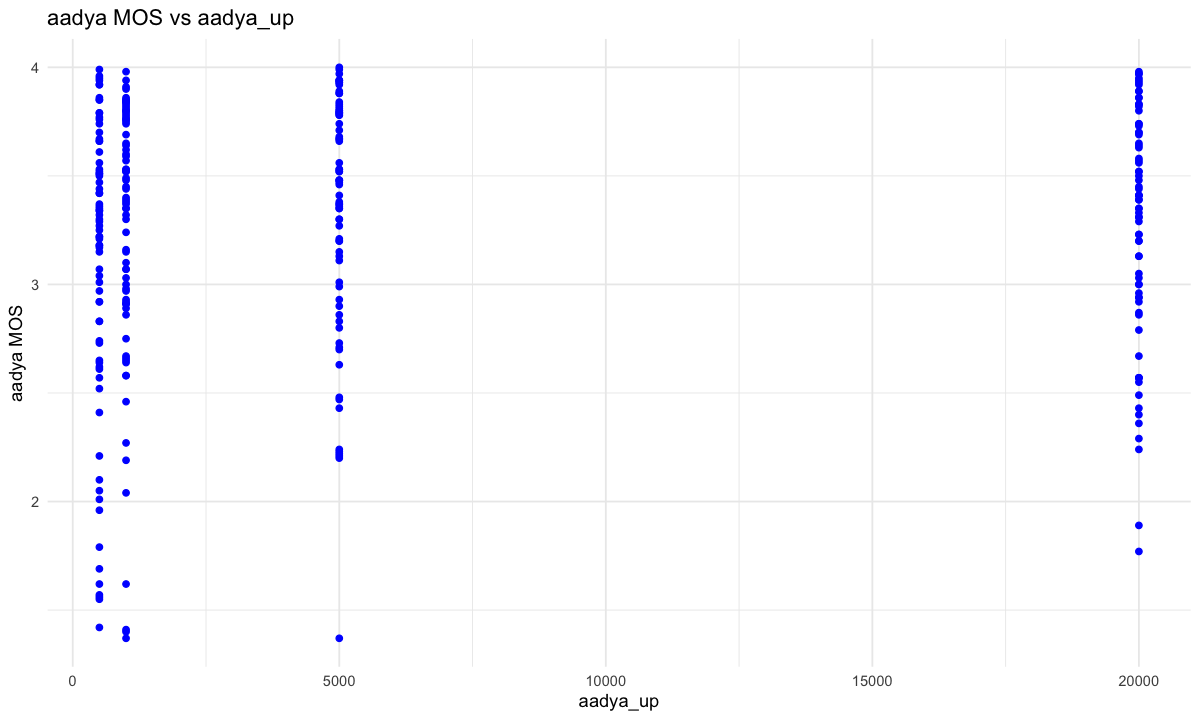

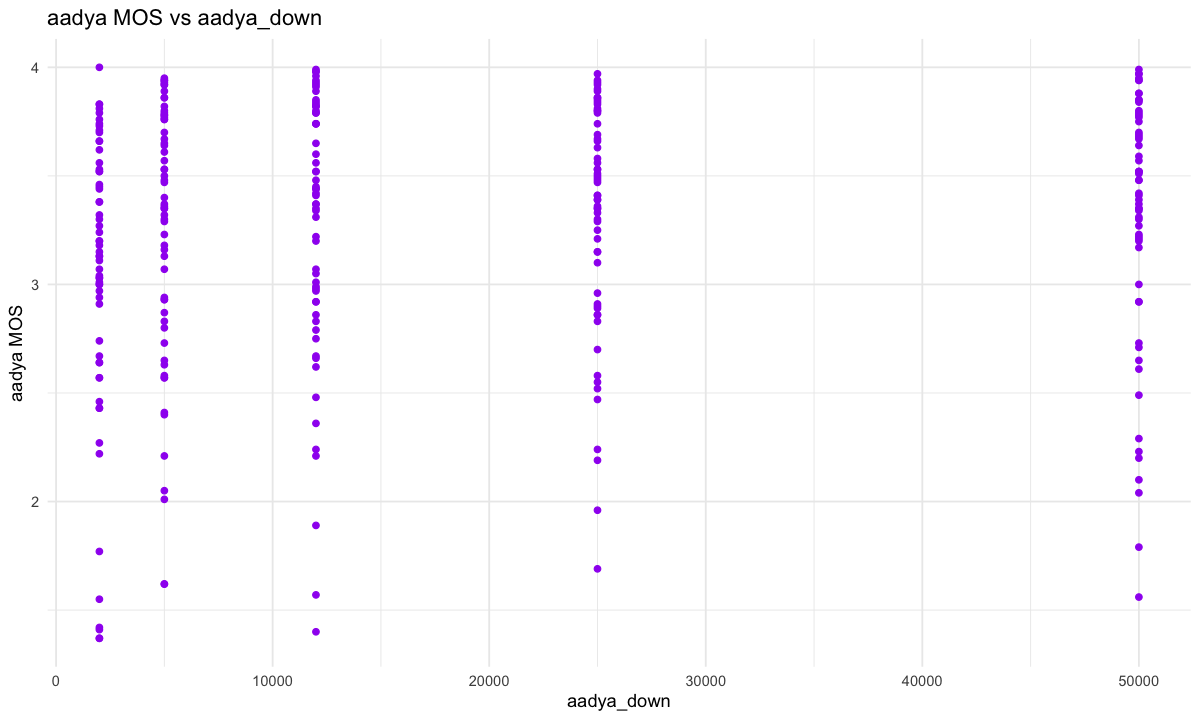

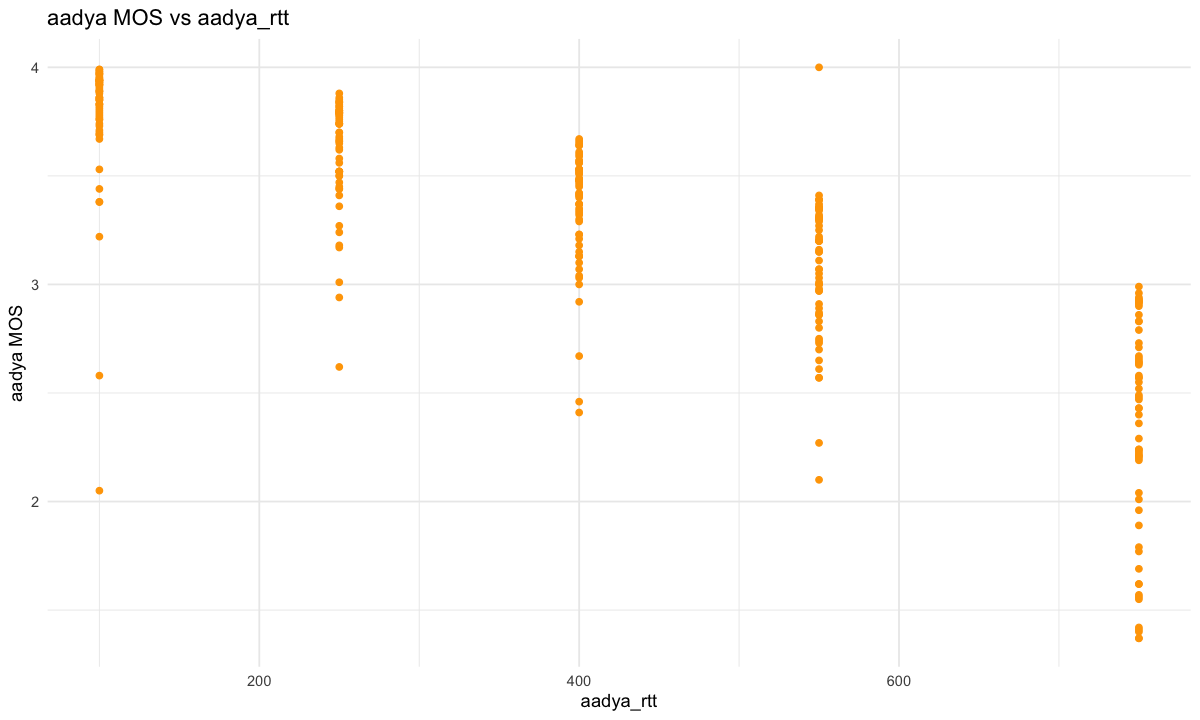

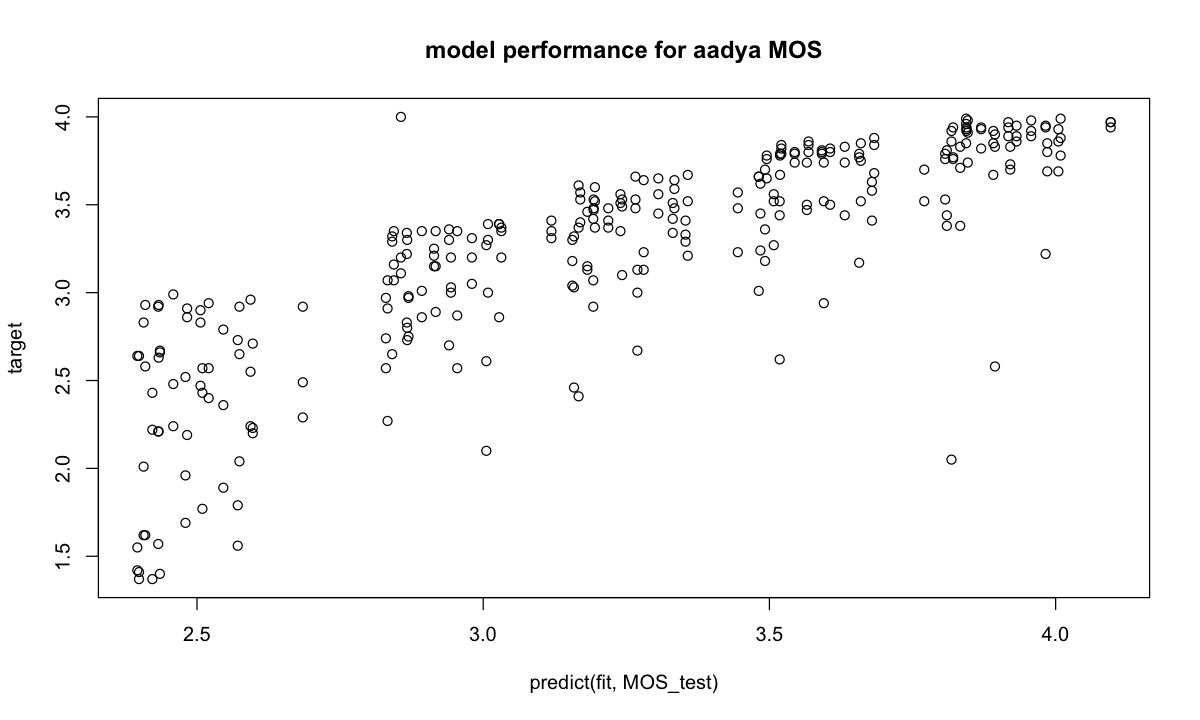

In [22]:
plot_vars_against_targ(MOS_test$aadya_MOS, "aadya MOS")


Call:
lm(formula = target ~ aadya_up + aadya_down + aadya_rtt, data = MOS_test)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.86620 -0.26851 -0.04061  0.52009  0.92149 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.928e+00  8.799e-02  33.275   <2e-16 ***
aadya_up     5.312e-05  4.512e-06  11.775   <2e-16 ***
aadya_down   2.545e-06  2.042e-06   1.246    0.214    
aadya_rtt   -1.396e-05  1.569e-04  -0.089    0.929    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6156 on 295 degrees of freedom
Multiple R-squared:  0.3217,	Adjusted R-squared:  0.3148 
F-statistic: 46.64 on 3 and 295 DF,  p-value: < 2.2e-16



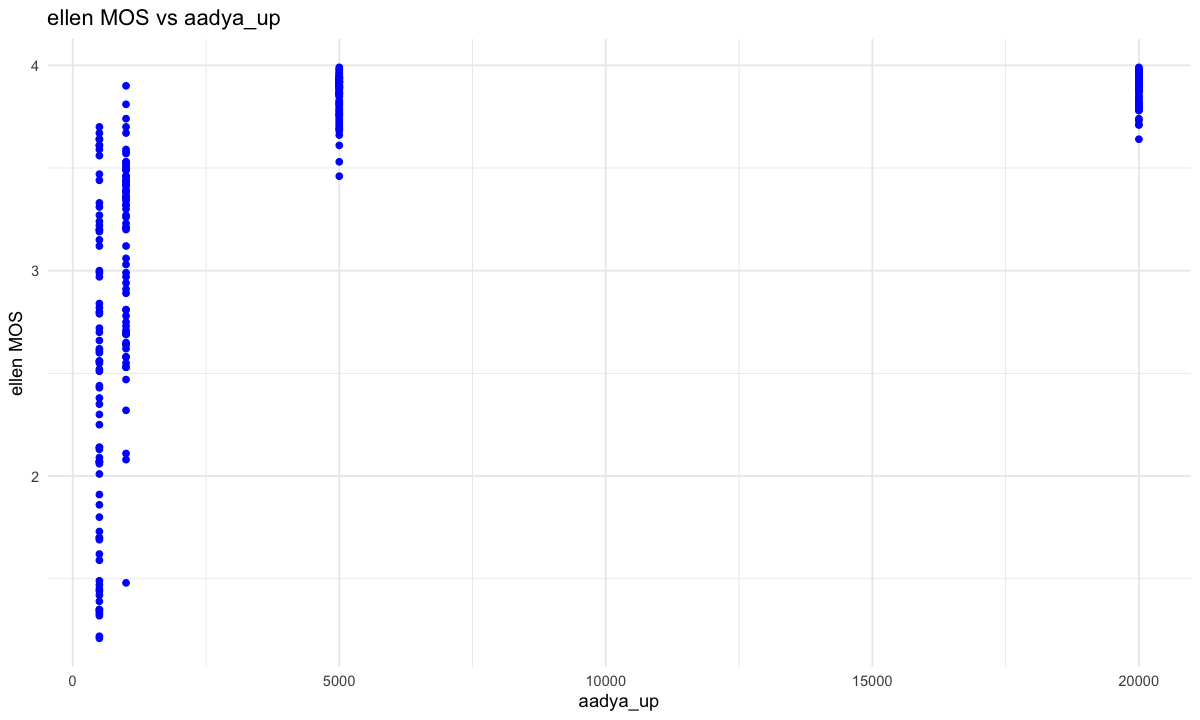

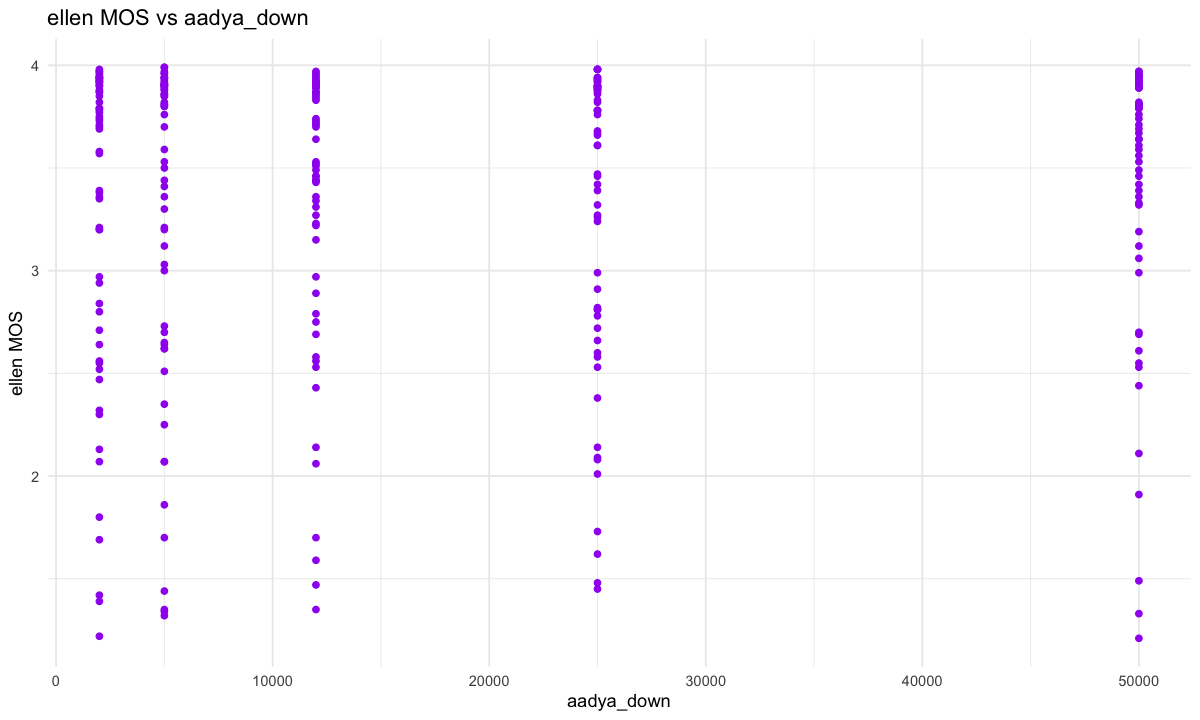

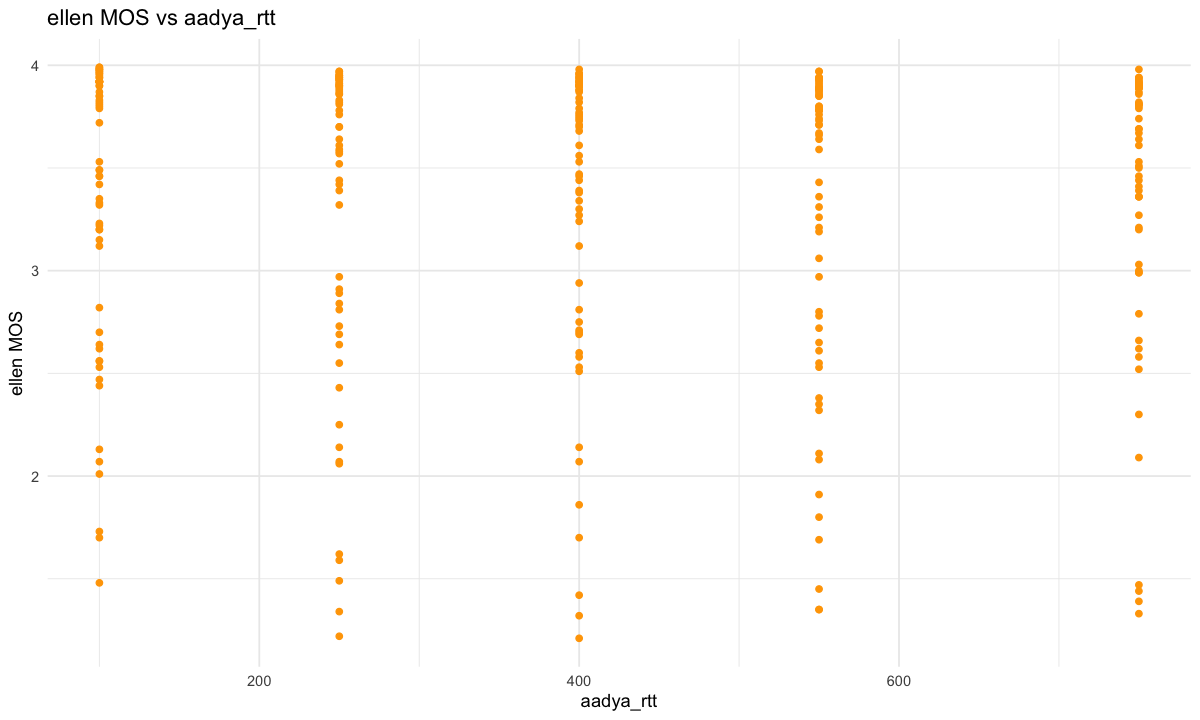

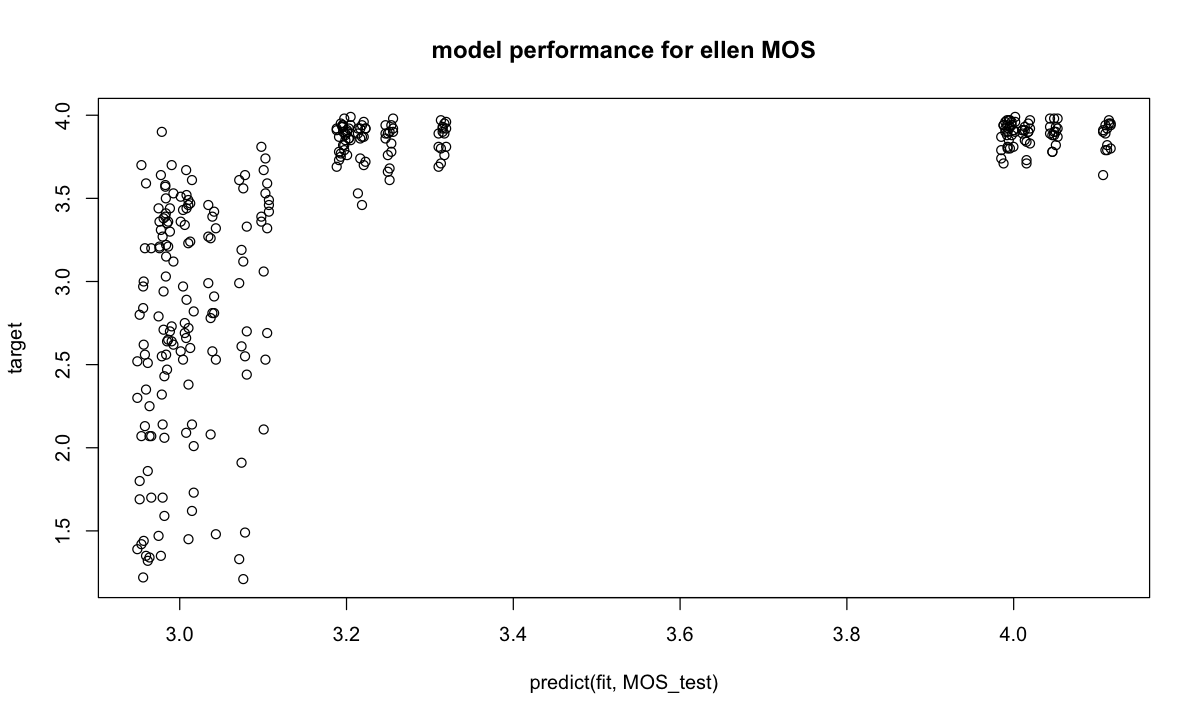

In [23]:
plot_vars_against_targ(MOS_test$ellen_MOS, "ellen MOS")

# STAGE 2

In [103]:
stage1 <- read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/STAGE1_final_regression_table.csv")
stage2 <- read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/STAGE2_final_regression_table.csv")

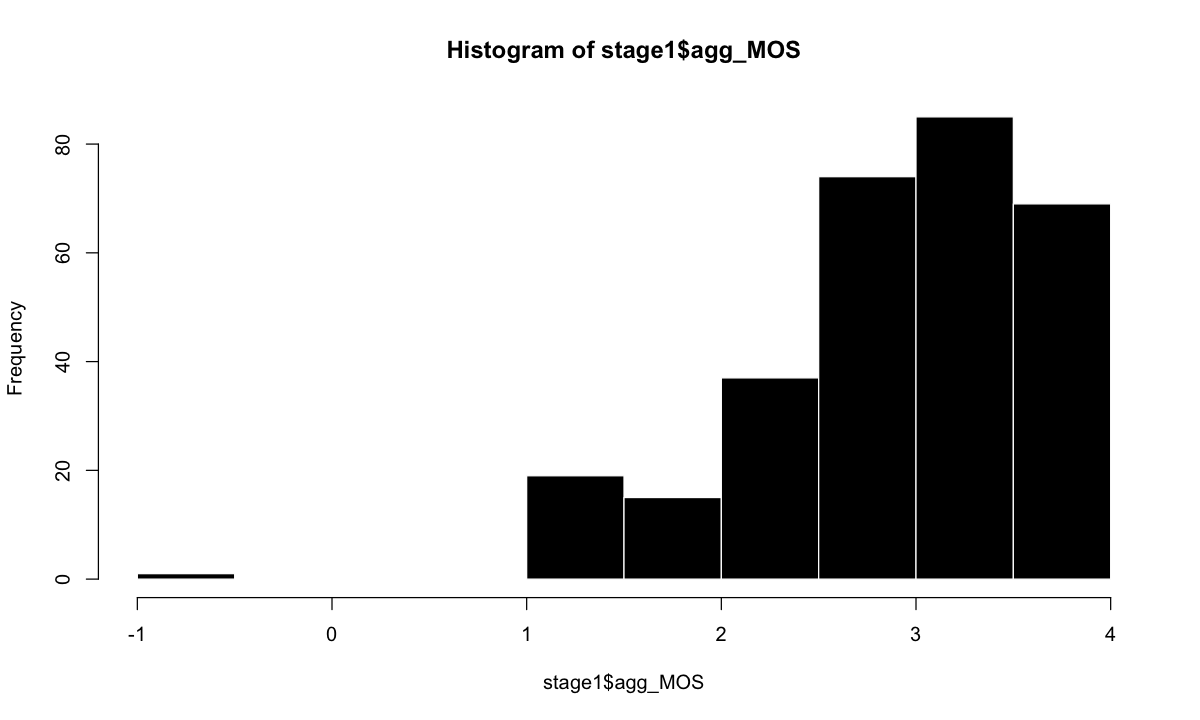

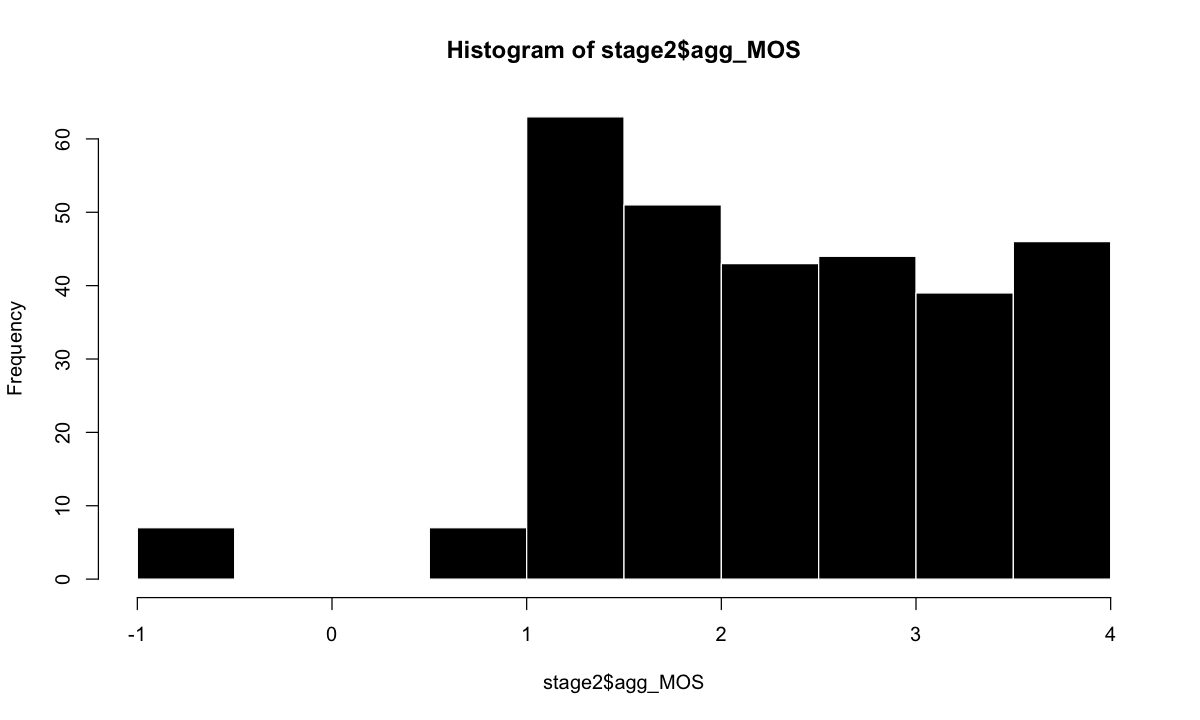

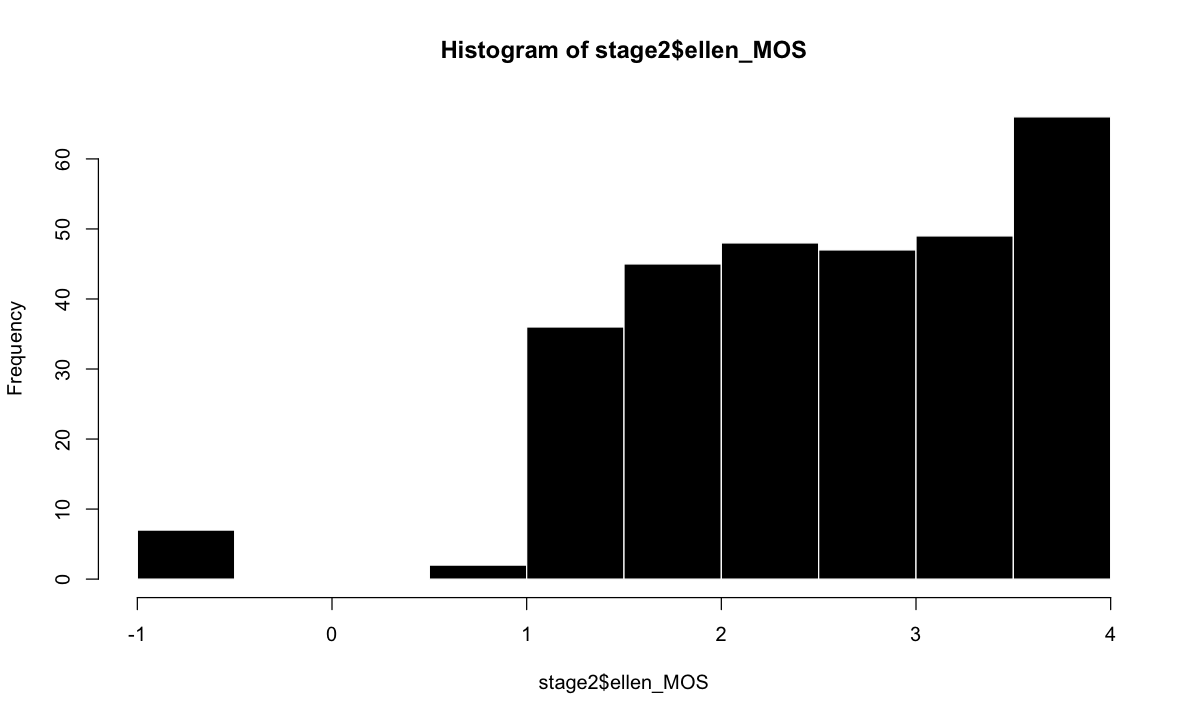

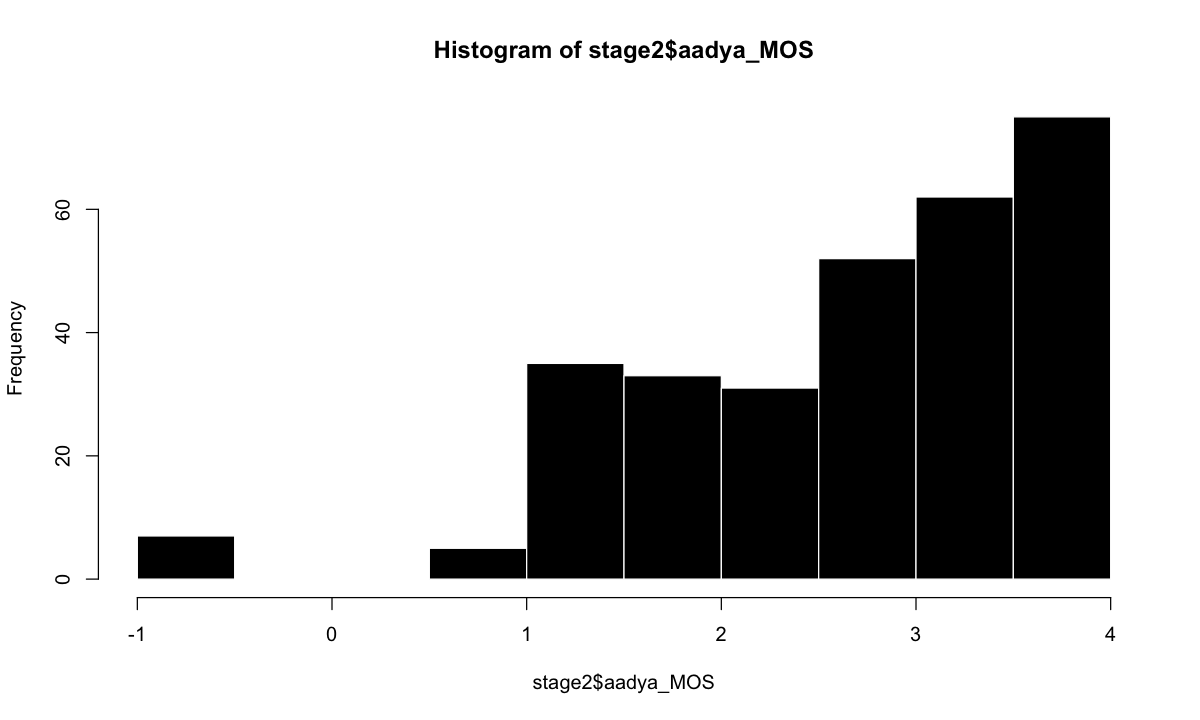

In [105]:
par(bg = "white")
hist(stage1$agg_MOS, 
     col = "black",
     border = "white")
     
par(bg = "white")
hist(stage2$agg_MOS, 
     col = "black",
     border = "white")


par(bg = "white")
hist(stage2$ellen_MOS, 
     col = "black",
     border = "white")

par(bg = "white")
hist(stage2$aadya_MOS, 
     col = "black",
     border = "white")

In [115]:
plot_vars_against_targ <- function(target, target_name) {
  library(ggplot2)
  #import data
  MOS_test <- read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/STAGE2_final_regression_table.csv") 
  #perform fit
  fit <- lm(target ~ aadya_up + aadya_down + aadya_rtt + log(ellen_up) + ellen_down + ellen_rtt, MOS_test)
  #print summary of variables and significance
  print(summary(fit))

  #set up plotting environment
  options(repr.plot.width = 10, repr.plot.height = 6) #fix size
  par(bg = "white")  # set background color to white

  # Scatter plot for aadya_up
  p1 <- ggplot(MOS_test, aes(x = aadya_up, y = target)) +
    geom_point(color = "blue") +
    labs(title = paste(target_name, "vs aadya_up"), x = "aadya_up", y = target_name) +
    theme_minimal()
  print(p1)
  p2 <- ggplot(MOS_test, aes(x = aadya_down, y = target)) +
    geom_point(color = "purple") +
    labs(title = paste(target_name, "vs aadya_down"), x = "aadya_down", y = target_name) +
    theme_minimal()
  print(p2)
  p3 <- ggplot(MOS_test, aes(x = aadya_rtt, y = target)) +
    geom_point(color = "orange") +
    labs(title = paste(target_name, "vs aadya_rtt"), x = "aadya_rtt", y = target_name) +
    theme_minimal()
  print(p3)
  #plots the predicted values against the real values for each datapoint
  predictions <- predict(fit, MOS_test)
  plot(predict(fit, MOS_test), target, main= paste("model performance for", target_name))
}


Call:
lm(formula = target ~ aadya_up + aadya_down + aadya_rtt + log(ellen_up) + 
    ellen_down + ellen_rtt, data = MOS_test)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1803 -0.3603  0.0799  0.5060  1.6346 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.800e-01  2.859e-01   0.979 0.328301    
aadya_up       1.055e-05  5.869e-06   1.797 0.073394 .  
aadya_down    -9.050e-06  2.637e-06  -3.432 0.000686 ***
aadya_rtt     -6.286e-05  2.061e-04  -0.305 0.760567    
log(ellen_up)  3.562e-01  3.242e-02  10.990  < 2e-16 ***
ellen_down     4.141e-07  2.643e-06   0.157 0.875615    
ellen_rtt     -1.642e-03  2.056e-04  -7.988 3.15e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7959 on 293 degrees of freedom
Multiple R-squared:  0.4156,	Adjusted R-squared:  0.4037 
F-statistic: 34.73 on 6 and 293 DF,  p-value: < 2.2e-16



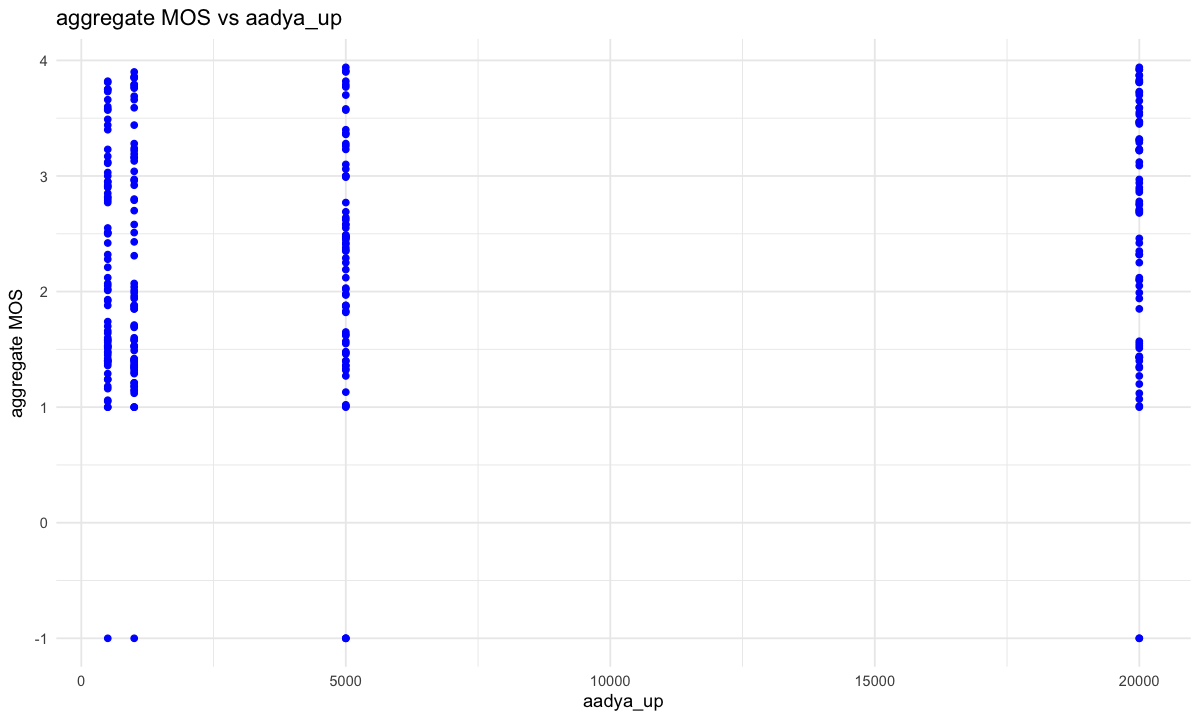

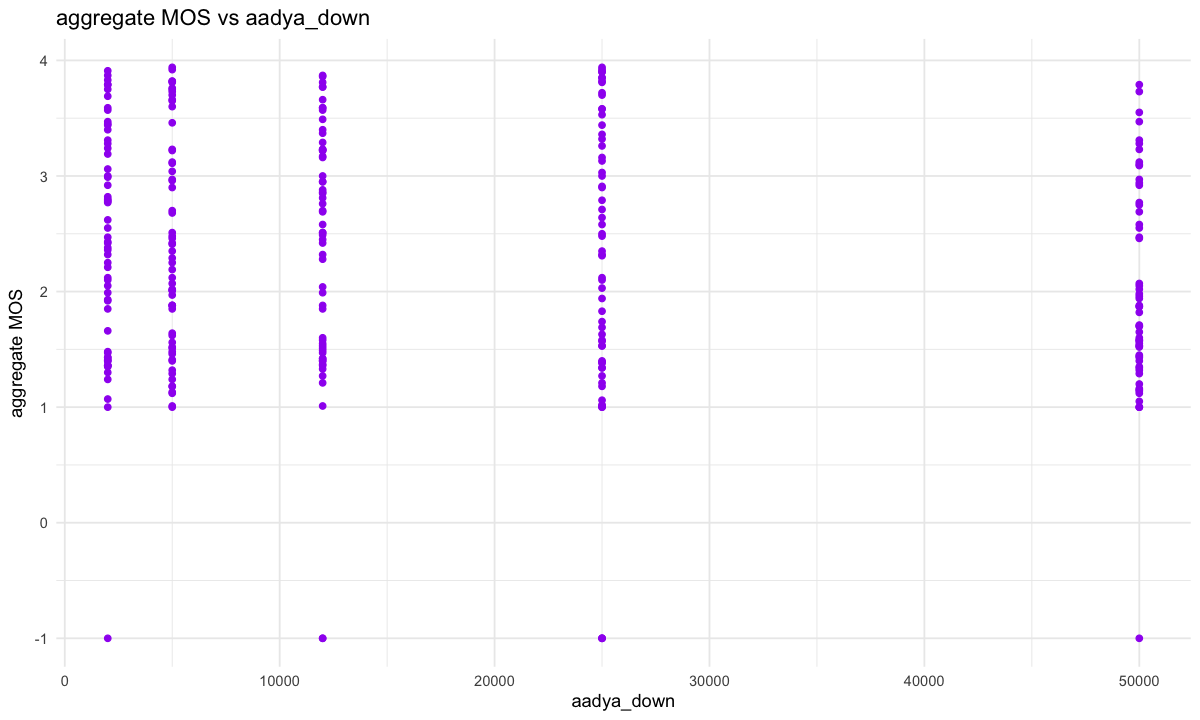

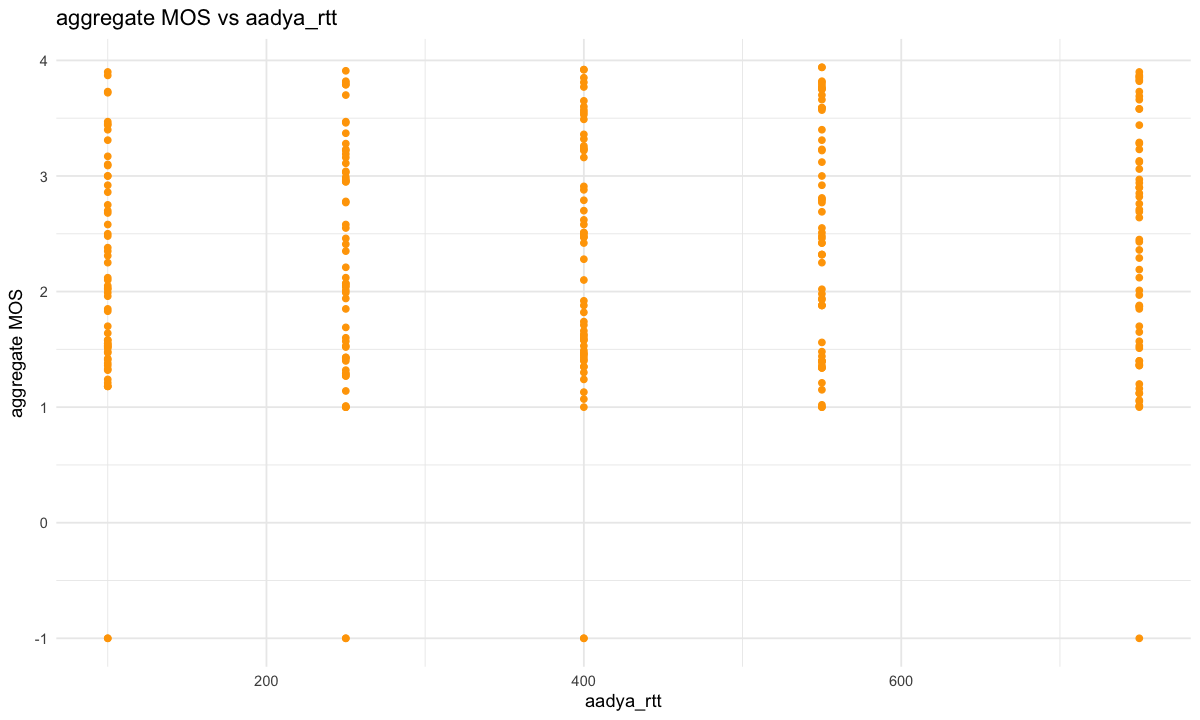

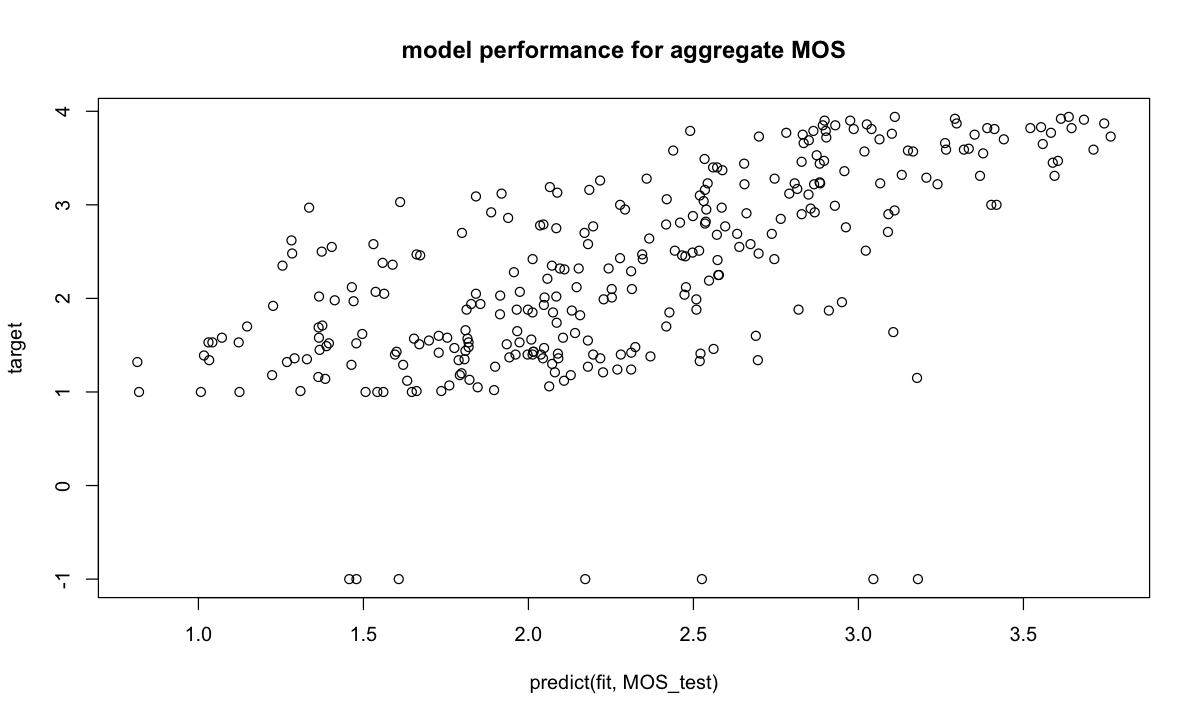

In [116]:
plot_vars_against_targ(stage2$agg_MOS, "aggregate MOS")


Call:
lm(formula = target ~ aadya_up + aadya_down + aadya_rtt, data = MOS_test)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6003 -0.2436  0.1214  0.4056  1.4955 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.842e+00  8.336e-02  46.089  < 2e-16 ***
aadya_up     1.548e-05  4.255e-06   3.639 0.000323 ***
aadya_down   1.422e-06  1.925e-06   0.739 0.460702    
aadya_rtt   -2.491e-03  1.486e-04 -16.765  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5834 on 296 degrees of freedom
Multiple R-squared:  0.499,	Adjusted R-squared:  0.4939 
F-statistic: 98.28 on 3 and 296 DF,  p-value: < 2.2e-16



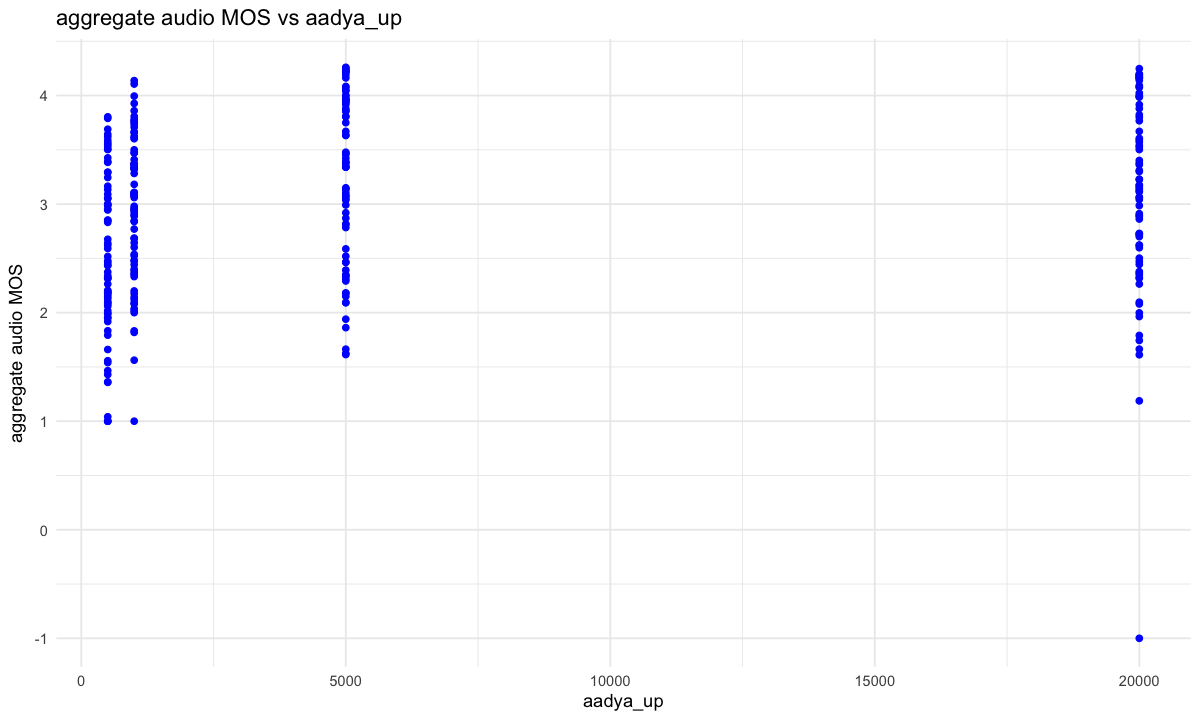

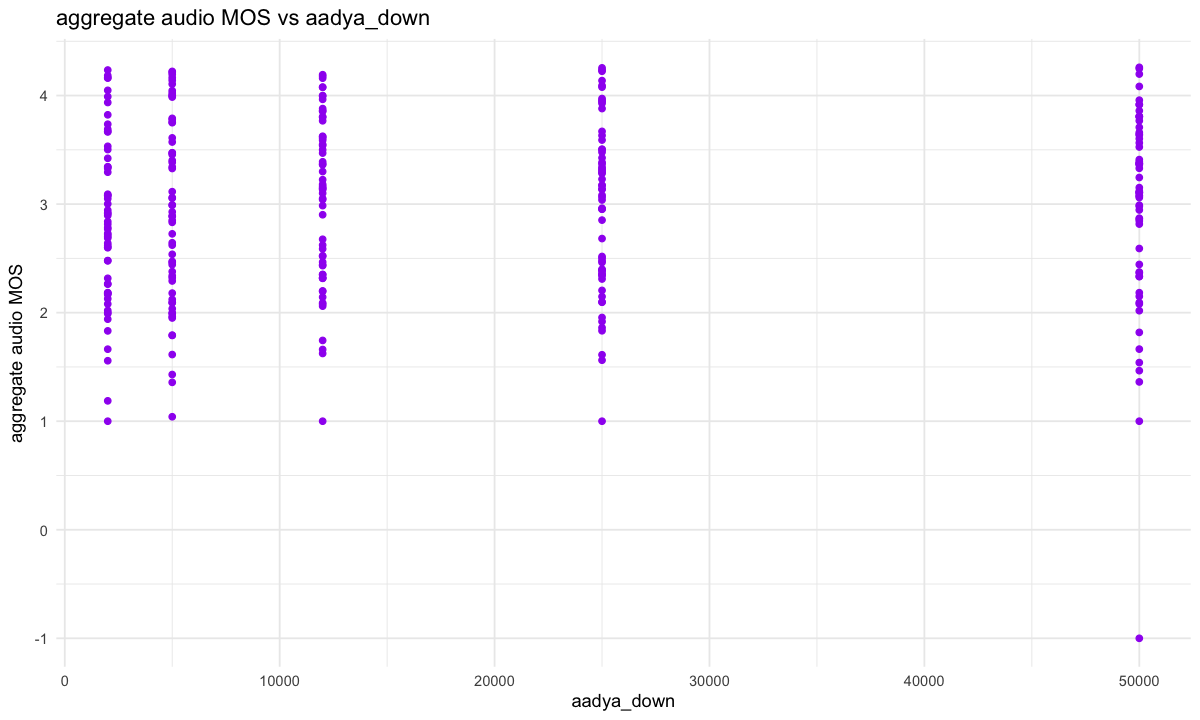

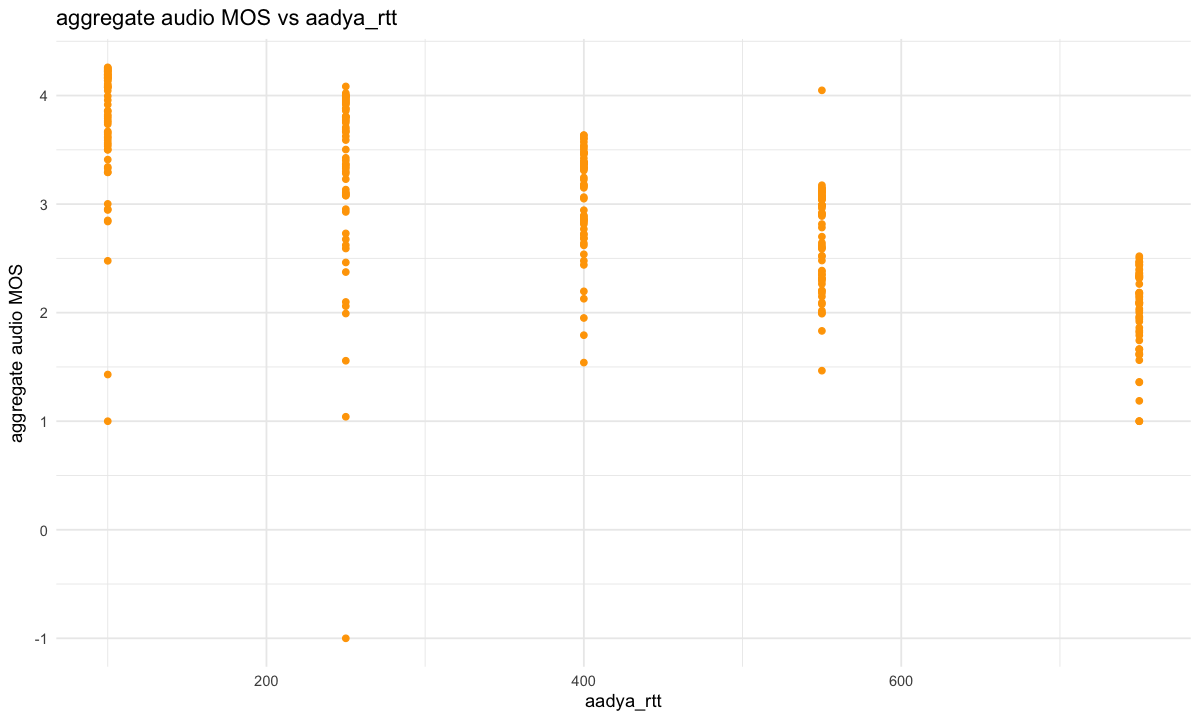

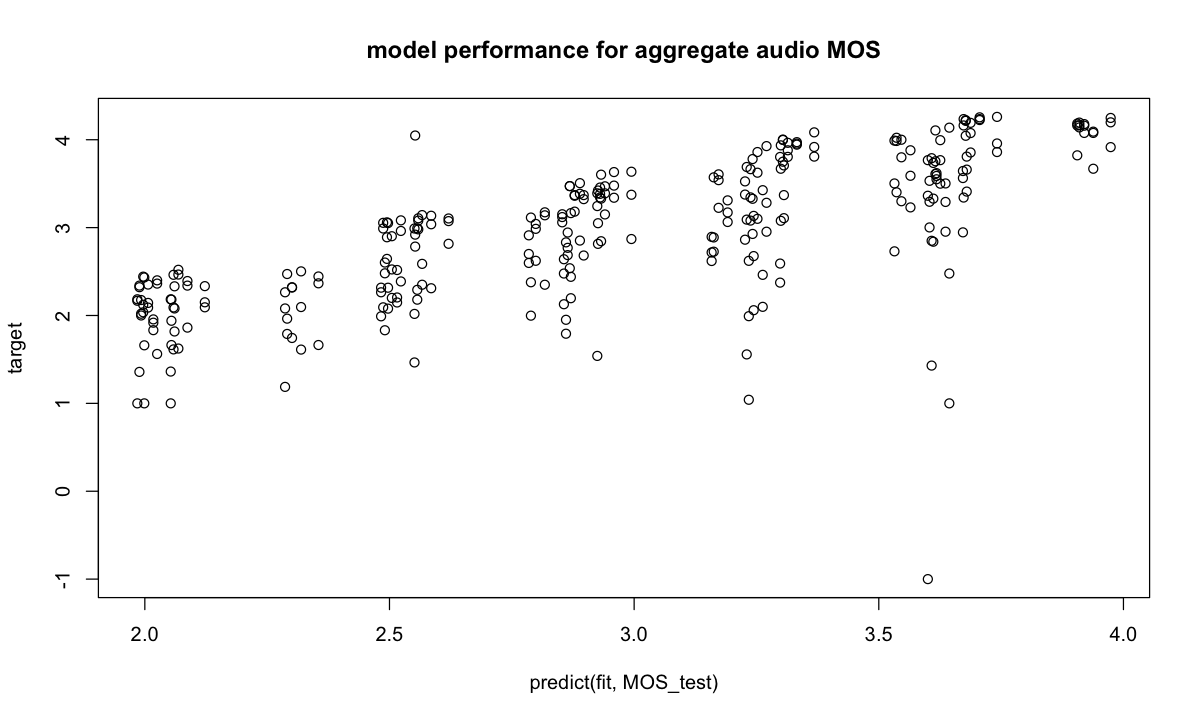

In [32]:
plot_vars_against_targ(MOS_test$agg_audio_MOS, "aggregate audio MOS")


Call:
lm(formula = target ~ aadya_up + aadya_down + aadya_rtt, data = MOS_test)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8297 -0.4452  0.2985  0.5510  1.1321 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.316e+00  1.126e-01  29.454  < 2e-16 ***
aadya_up     6.525e-06  5.746e-06   1.136    0.257    
aadya_down   3.932e-06  2.600e-06   1.513    0.131    
aadya_rtt   -1.207e-03  2.006e-04  -6.016 5.26e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7879 on 296 degrees of freedom
Multiple R-squared:  0.1185,	Adjusted R-squared:  0.1095 
F-statistic: 13.26 on 3 and 296 DF,  p-value: 3.819e-08



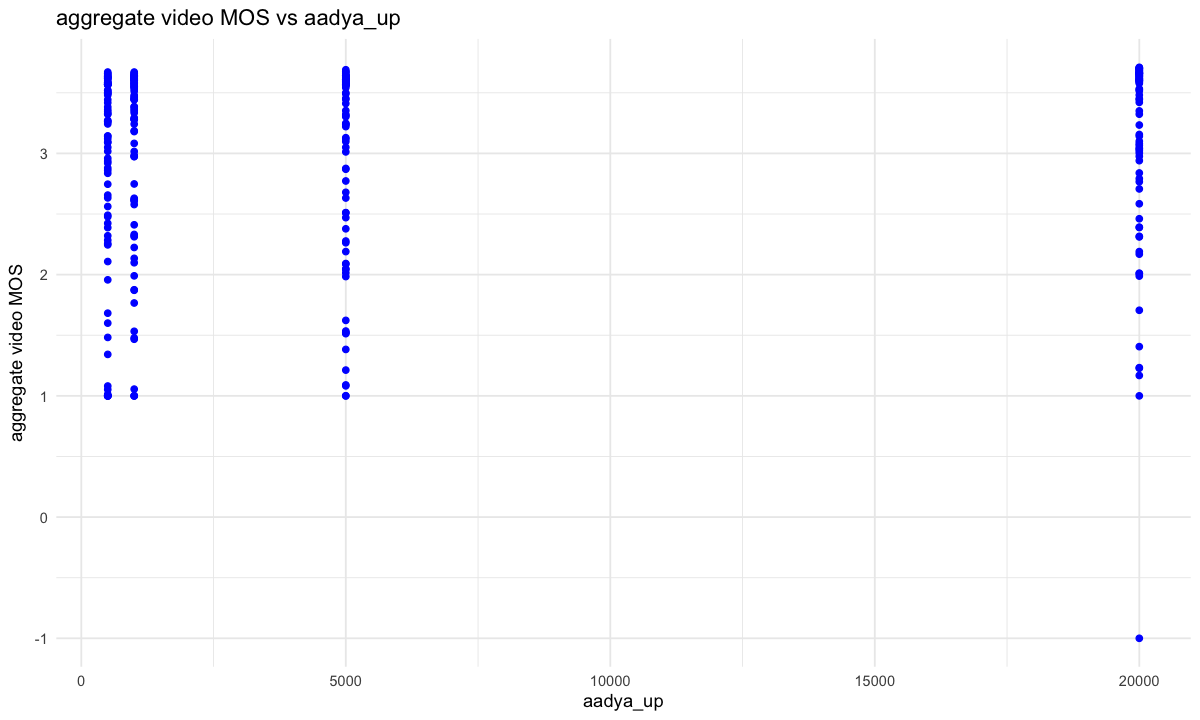

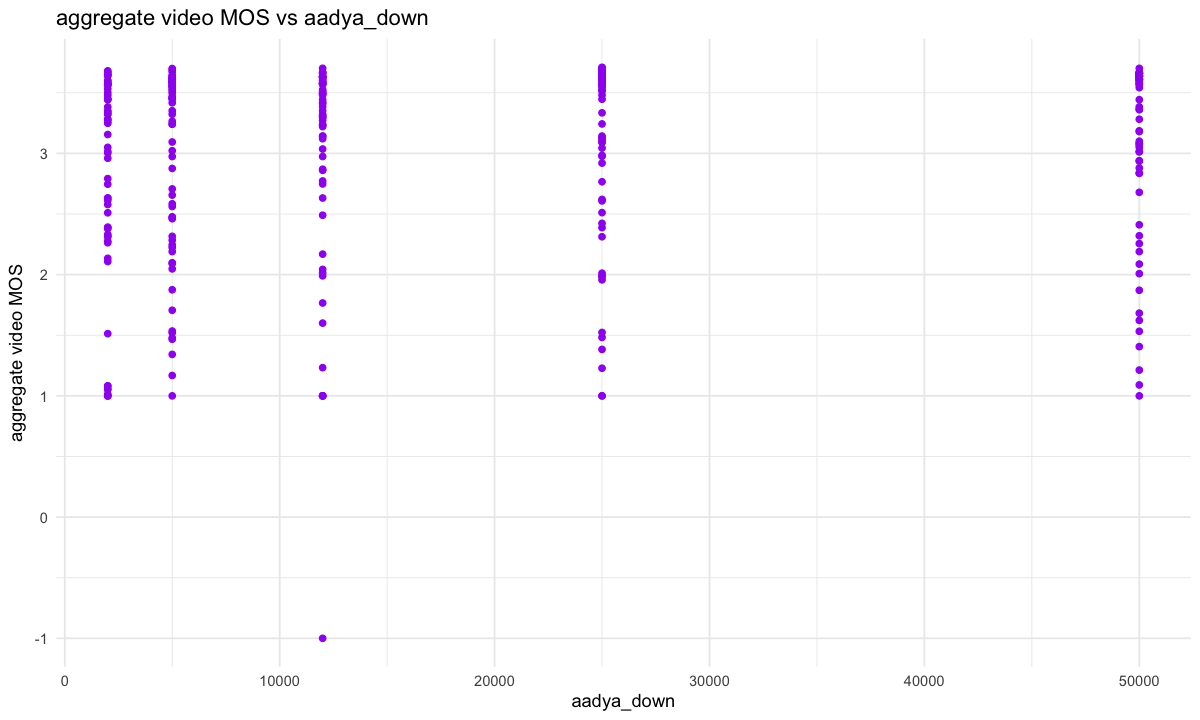

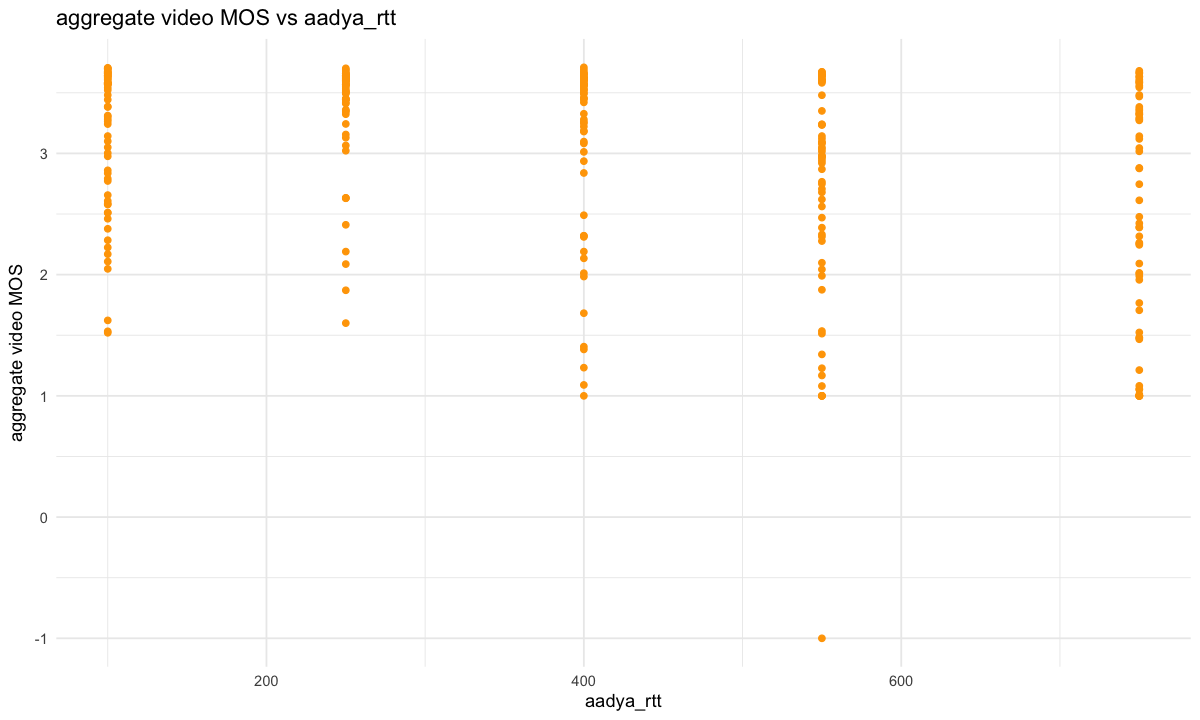

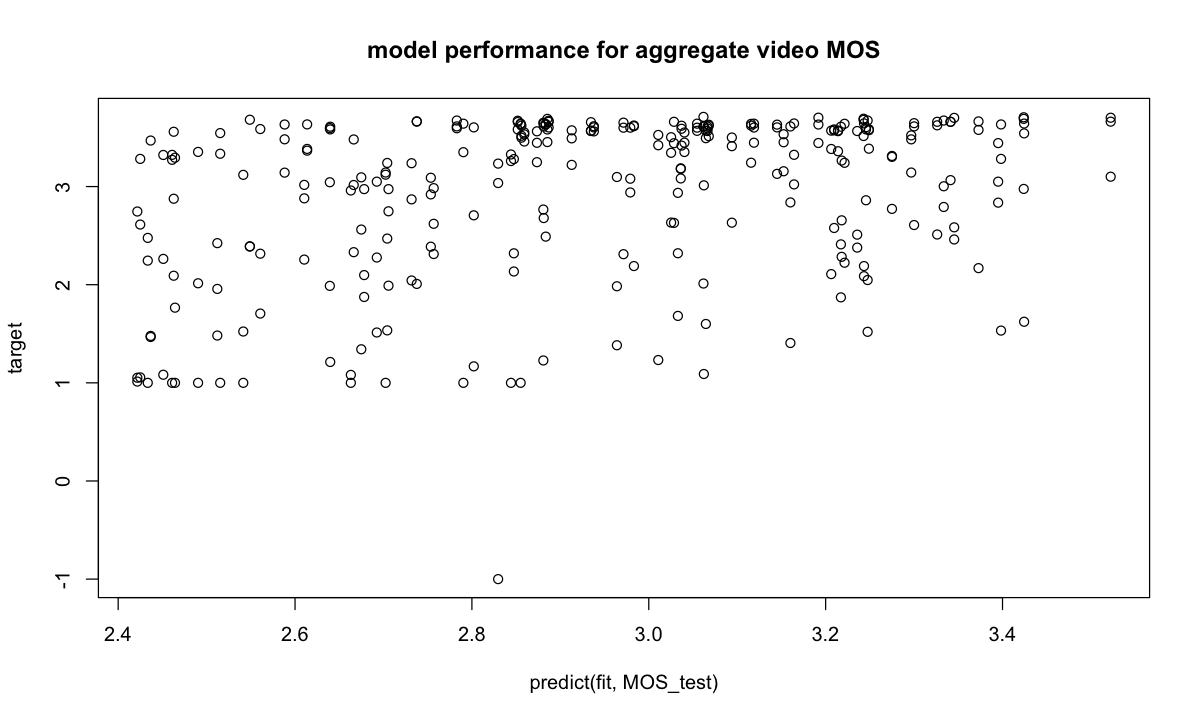

In [98]:
plot_vars_against_targ(MOS_test$agg_video_MOS, "aggregate video MOS")


Call:
lm(formula = target ~ aadya_up + aadya_down + aadya_rtt, data = MOS_test)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9858 -0.2277  0.0019  0.5406  0.8815 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.946e+00  9.732e-02  30.272   <2e-16 ***
aadya_up    4.949e-05  4.967e-06   9.963   <2e-16 ***
aadya_down  8.077e-07  2.247e-06   0.359    0.720    
aadya_rtt   3.911e-05  1.734e-04   0.225    0.822    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6811 on 296 degrees of freedom
Multiple R-squared:  0.2515,	Adjusted R-squared:  0.2439 
F-statistic: 33.15 on 3 and 296 DF,  p-value: < 2.2e-16



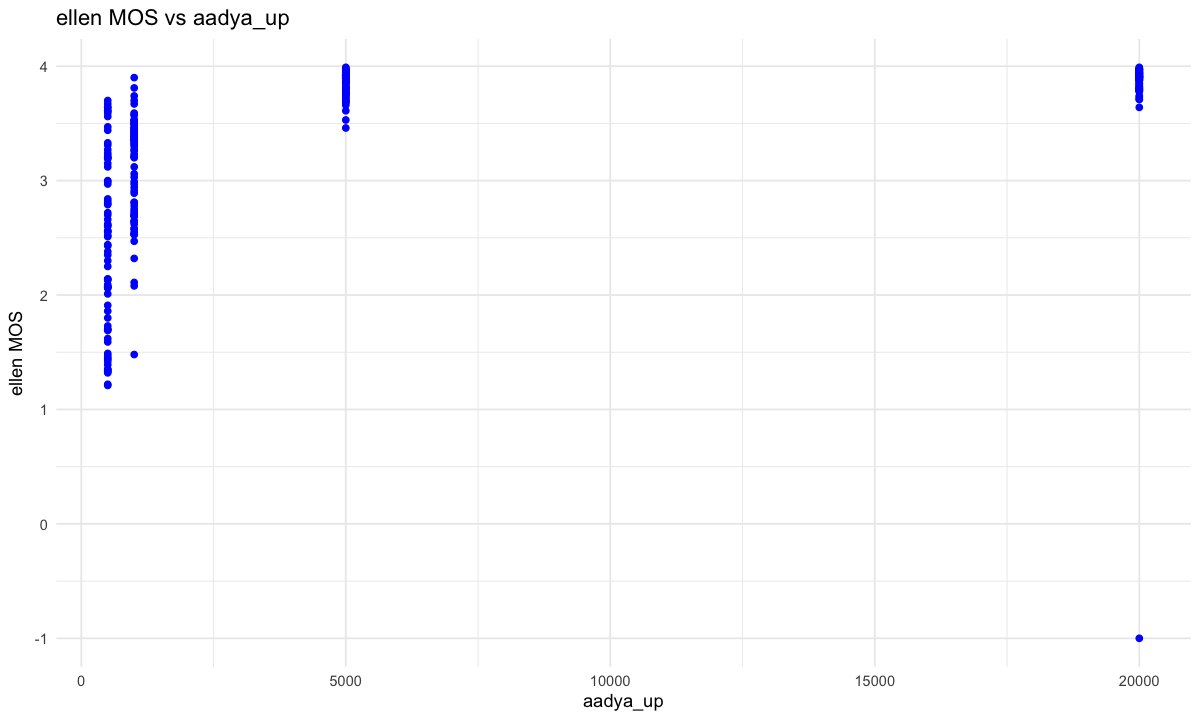

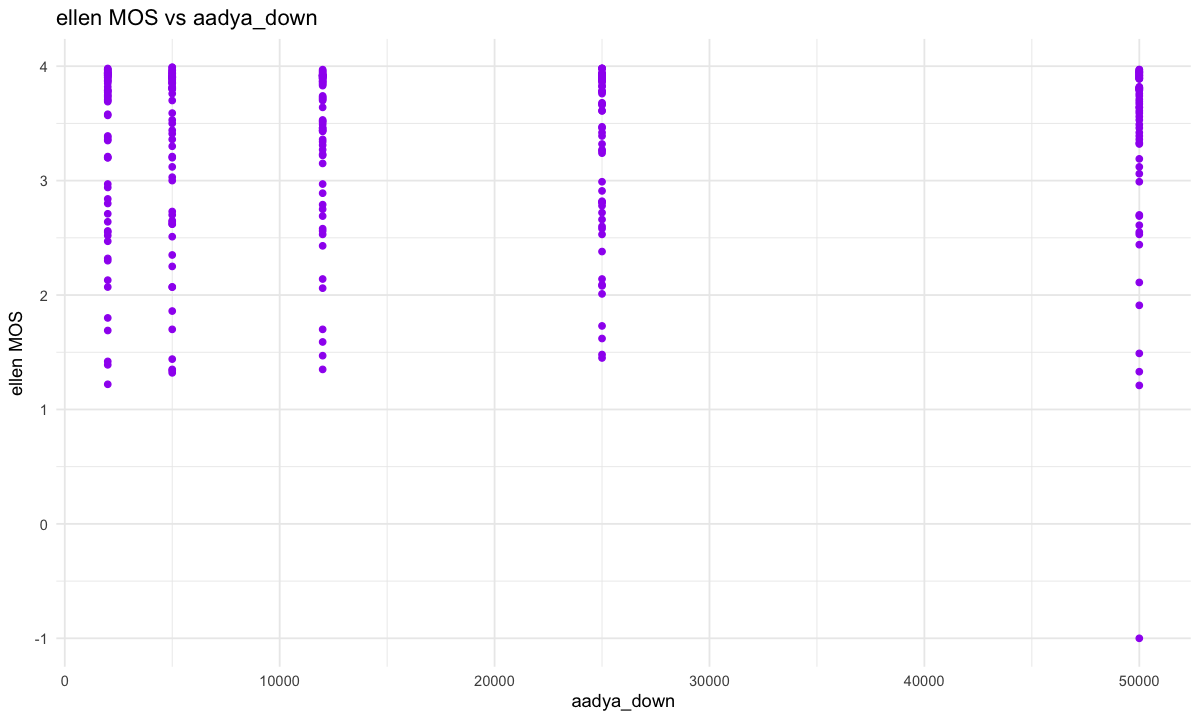

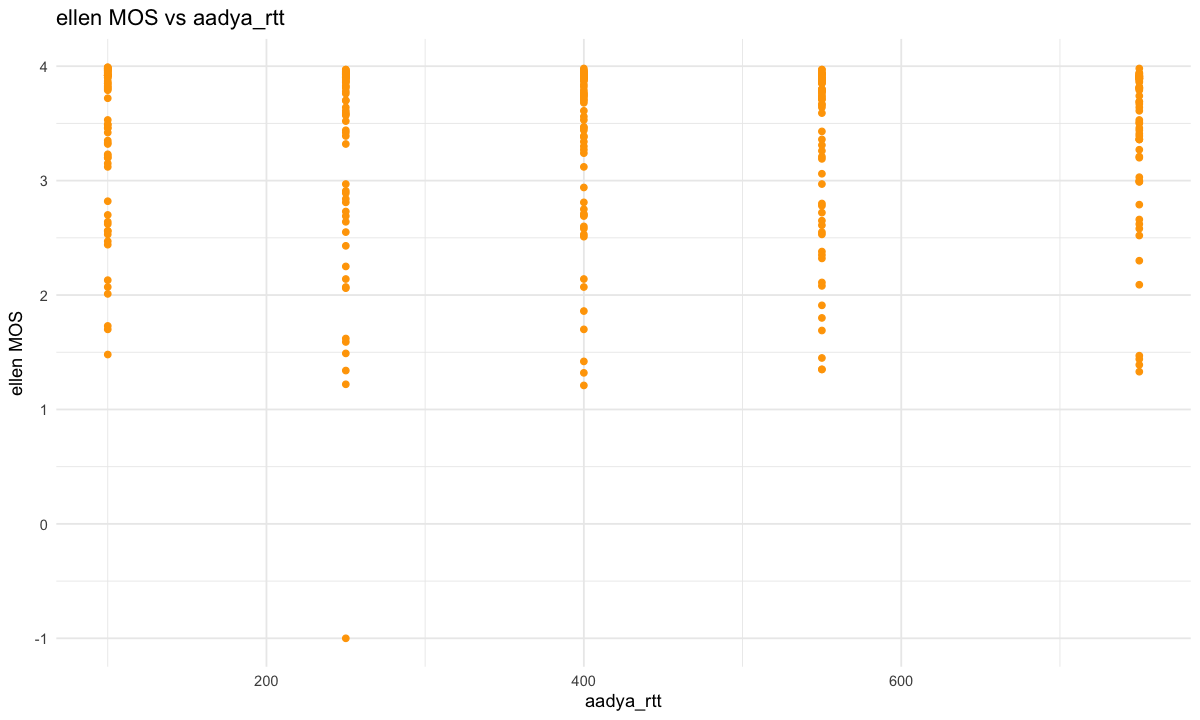

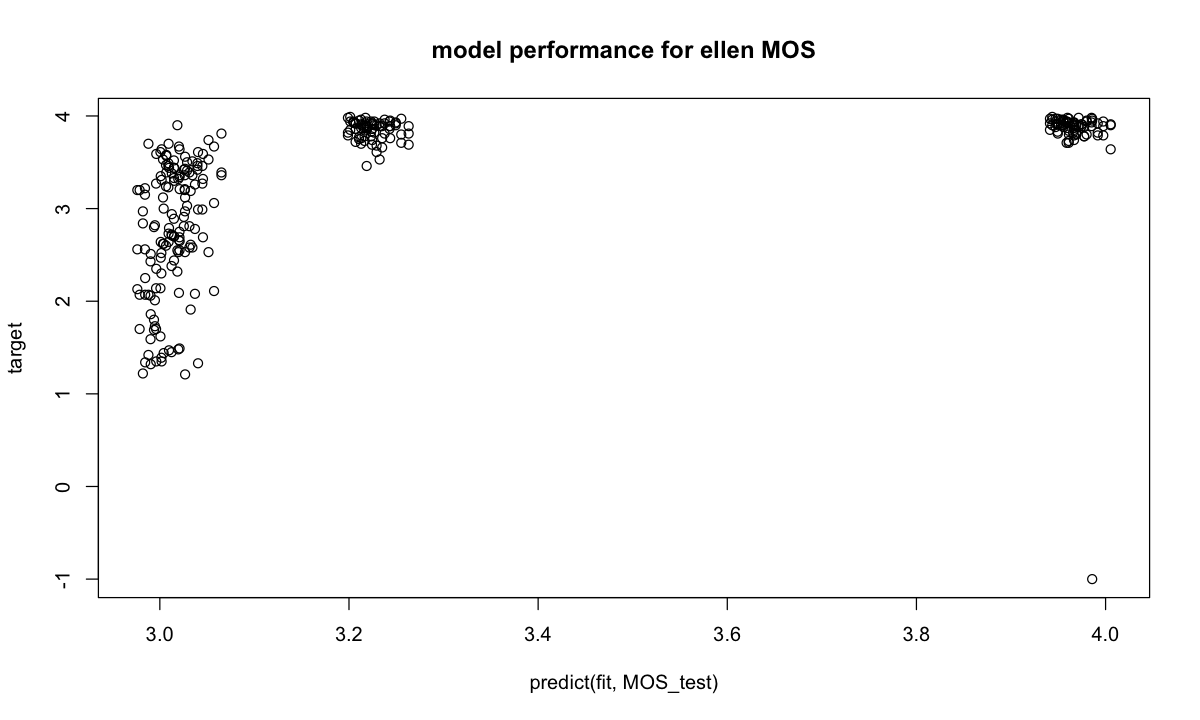

In [33]:
plot_vars_against_targ(MOS_test$ellen_MOS, "ellen MOS")


Call:
lm(formula = target ~ aadya_up + aadya_down + aadya_rtt, data = MOS_test)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6507 -0.1049  0.0785  0.2568  1.1200 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.031e+00  6.417e-02  62.816   <2e-16 ***
aadya_up     2.436e-06  3.275e-06   0.744    0.458    
aadya_down   2.034e-06  1.482e-06   1.373    0.171    
aadya_rtt   -2.122e-03  1.144e-04 -18.553   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4491 on 296 degrees of freedom
Multiple R-squared:  0.5394,	Adjusted R-squared:  0.5347 
F-statistic: 115.5 on 3 and 296 DF,  p-value: < 2.2e-16



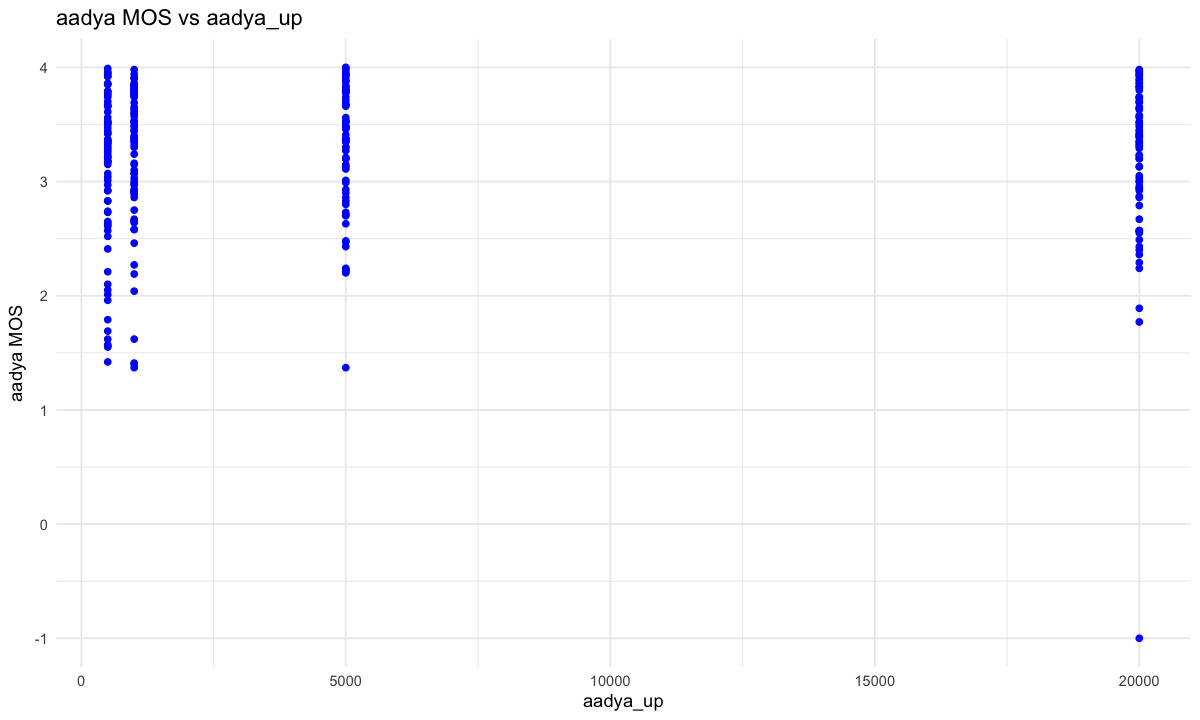

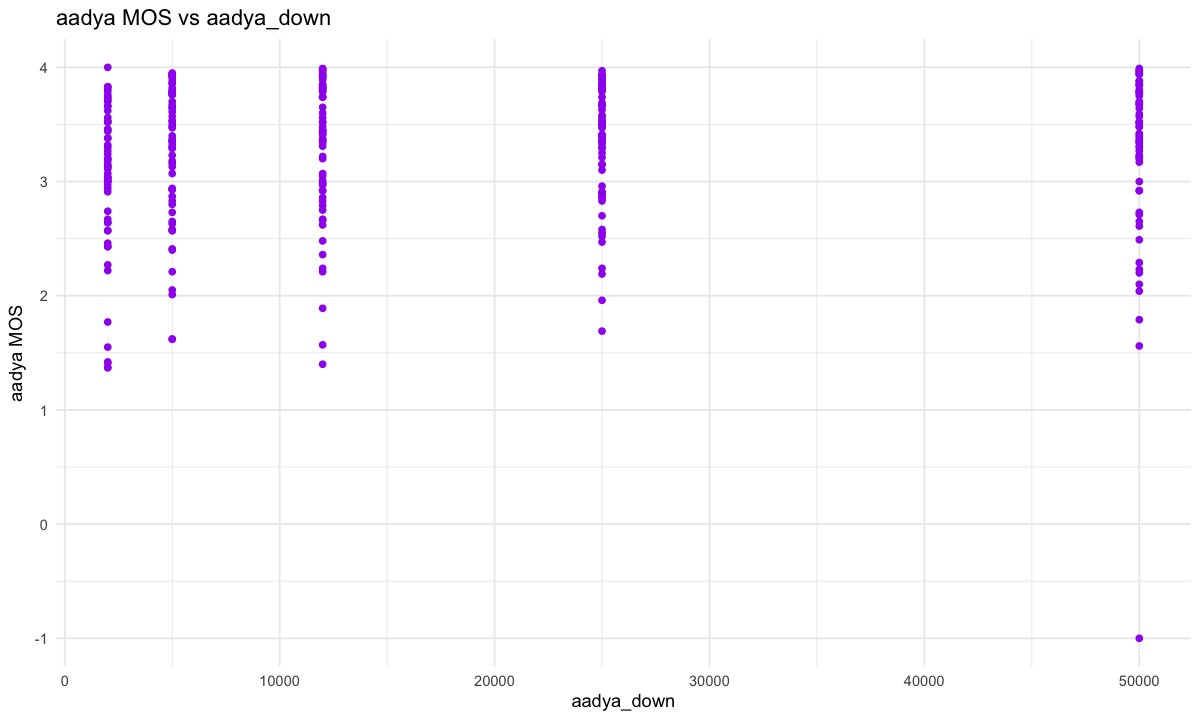

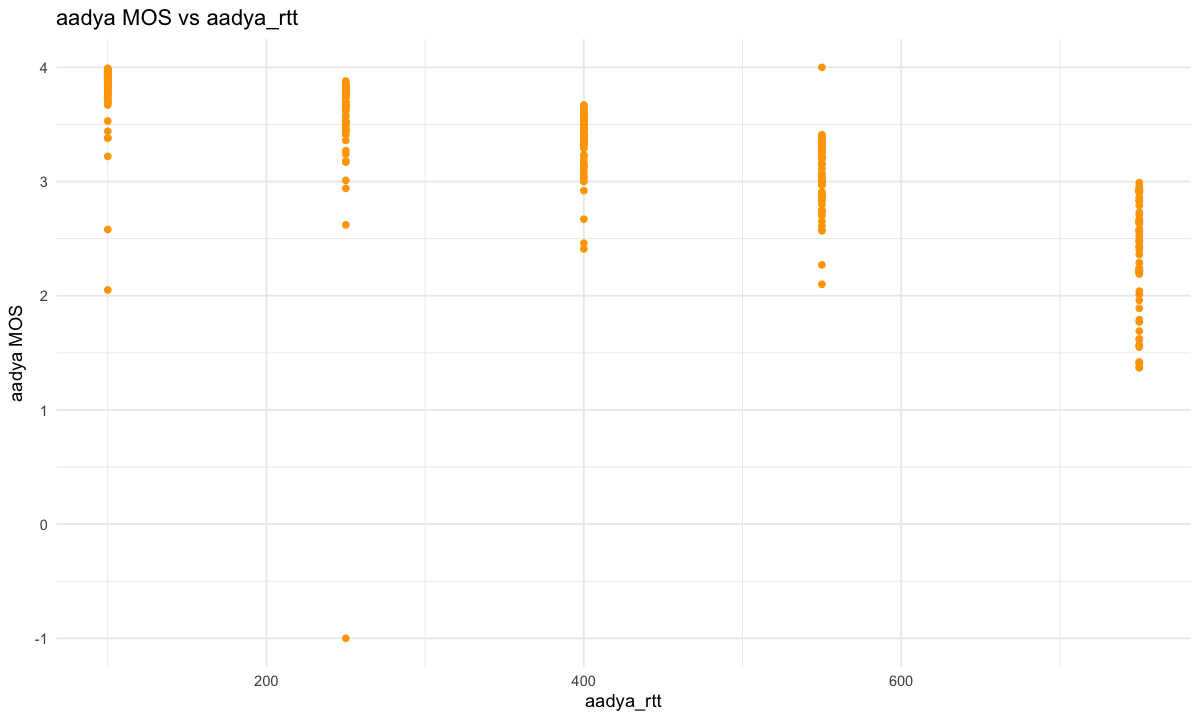

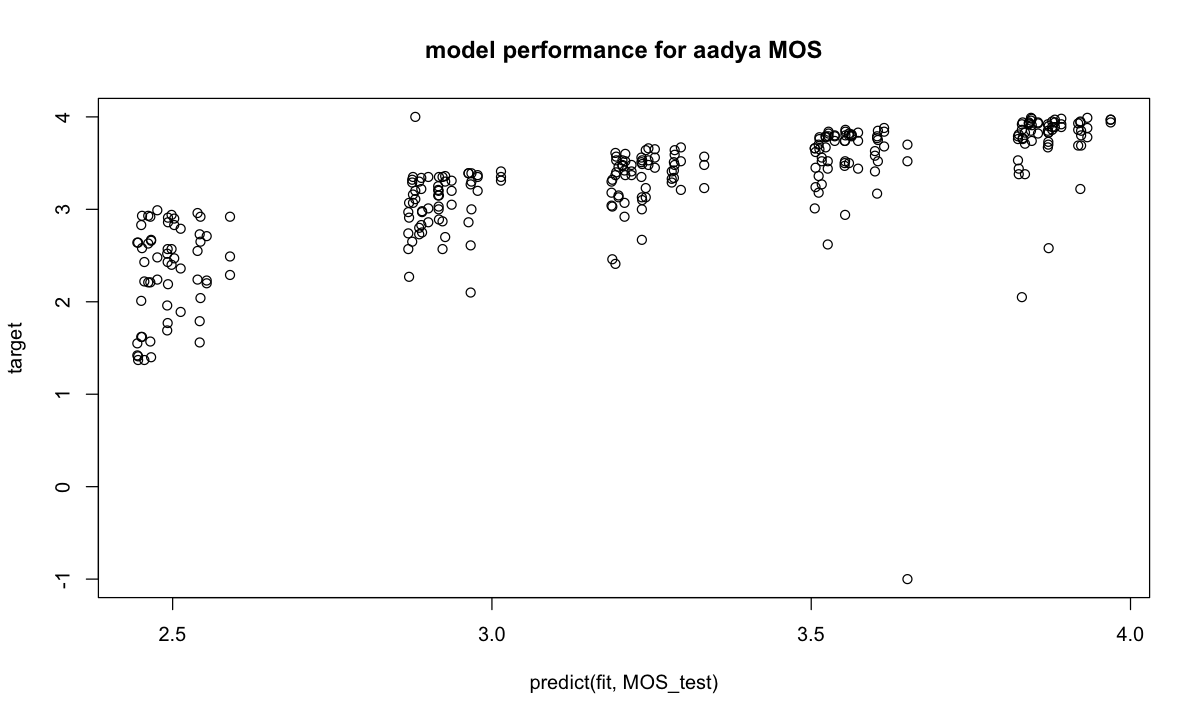

In [34]:
plot_vars_against_targ(MOS_test$aadya_MOS, "aadya MOS")

# Logistic Regression

I'm not sure if this is right but I think if MOS is categorical it should be something like this

In [ ]:
library(nnet)

# Fit the logistic regression model
model <- multinom(AGG_MOST ~ up + down + rtt, data = MOS_test)
summary(model)
# Get predictions
predictions <- predict(model, MOS_test, type = "probs")
print(prediction)